In [1]:
### import manually defined automata
%matplotlib inline
from csrl.pomdp import GridPOMDP
from csrl.oaa import oaa
from csrl import ControlSynthesis
import numpy as np 

oa=oaa()

# LTL Specification
#ltl = 'GF(a & Fb) & G!c' ### goes to 'a' then 'b' recurrently, gallobly ! c
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

print('Initial state:',oa.q0)
print('Transition function: ['),print(*['  '+str(t) for t in oa.delta],sep=',\n'),print(']')
print('Acceptance: ['),print(*['  '+str(t) for t in oa.acc],sep=',\n'),print(']')

Number of Omega-automaton states (including the trap state): 3


Initial state: 0
Transition function: [
  {(): 0, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 1, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 2, ('a',): 2, ('b',): 2, ('c',): 2, ('a', 'b'): 2, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2}
]
Acceptance: [
  {(): [None], ('a',): [True], ('b',): [None], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [True], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]}
]


(None, None, None)

In [2]:
# POMDP Description
shape = (10,10)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'B',  'B',  'B',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'B',  'B',  'B',  'E',  'E',  'B',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'B',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'B',  'B',  'E',  'E',  'B',  'B',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'B',  'B',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E']
])

# Labels of the states
label = np.array([
[('c',),       ('c',),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[('c',),       ('c',),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       ('c',),       ('c',),       (),       (),       ()],
[(),       (),       (),       (),       (),       ('c',),       ('c',),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()]
],dtype=np.object)
# Colors of the labels
lcmap={
    ('a',):'lightgreen',
    ('b',):'lightgreen',
    ('c',):'pink'
}
grid_pomdp = GridPOMDP(shape=shape,structure=structure,label=label,lcmap=lcmap,figsize=5)  # Use figsize=4 for smaller figures

# Construct the product MDP
csrl = ControlSynthesis(grid_pomdp,oa)

C:\Users\JUNCHA~1\AppData\Local\Temp/ipykernel_25148/633445410.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ],dtype=np.object)


In [3]:
csrl.reward

array([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.,

In [4]:
csrl.A

array([[[[list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7])],
         [list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7])],
         [list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5, 6, 7]),
          list([0, 1, 2, 3, 4, 5

In [5]:
csrl.transition_probs

array([[[[[([(0, 2, 0, 1), (0, 2, 0, 0)], [0.024999999999999994, 0.975]),
           ([(0, 2, 1, 0), (0, 2, 0, 1), (0, 2, 1, 1), (0, 2, 0, 0)], [0.9, 0.024999999999999994, 0.024999999999999994, 0.04999999999999993]),
           ([(0, 2, 1, 0), (0, 2, 0, 1), (0, 2, 1, 1), (0, 2, 0, 0)], [0.024999999999999994, 0.9, 0.024999999999999994, 0.04999999999999993]),
           ..., None, None, None],
          [([(0, 2, 0, 0), (0, 2, 0, 2), (0, 2, 0, 1)], [0.024999999999999994, 0.024999999999999994, 0.95]),
           ([(0, 2, 1, 1), (0, 2, 0, 0), (0, 2, 0, 2), (0, 2, 1, 0), (0, 2, 1, 2)], [0.9, 0.024999999999999994, 0.024999999999999994, 0.024999999999999994, 0.024999999999999994]),
           ([(0, 2, 1, 1), (0, 2, 0, 2), (0, 2, 1, 2), (0, 2, 0, 1)], [0.024999999999999994, 0.9, 0.024999999999999994, 0.04999999999999993]),
           ..., None, None, None],
          [([(0, 0, 0, 1), (0, 0, 0, 3), (0, 0, 0, 2)], [0.024999999999999994, 0.024999999999999994, 0.95]),
           ([(0, 0, 1, 2), (0

In [ ]:
 t2, epsilon, average_accumulated_rewards = csrl.train_DRQN(EPISODES=25000, num_steps=800, batch_size=32, weights_update=50, state_sequence_size=5, label_sequence_size=3)

D:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


START state: (0, 0, 3, 8)
episode: 0/25000, steps: 52, e: 1.0
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 4)


D:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode: 1/25000, steps: 100, e: 1.0
accumulated_rewards_per_episode: -1.0000000000000007
START state: (0, 0, 9, 6)
episode: 2/25000, steps: 64, e: 1.0
accumulated_rewards_per_episode: -0.6400000000000003
START state: (0, 0, 0, 2)
episode: 3/25000, steps: 52, e: 1.0
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 7)
episode: 4/25000, steps: 52, e: 1.0
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 6)
episode: 5/25000, steps: 52, e: 1.0
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 8)
episode: 6/25000, steps: 110, e: 1.0
accumulated_rewards_per_episode: -0.10000000000000052
START state: (0, 0, 9, 2)
episode: 7/25000, steps: 97, e: 1.0
accumulated_rewards_per_episode: 0.02999999999999925
START state: (0, 0, 1, 8)
episode: 8/25000, steps: 52, e: 1.0
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 2)
episode: 9/25000, steps: 52, e: 1.0
accumulated_rewards_per_episode: -0.52000

episode: 73/25000, steps: 66, e: 0.97
accumulated_rewards_per_episode: 0.3399999999999995
START state: (0, 0, 2, 1)
episode: 74/25000, steps: 52, e: 0.97
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 8)
episode: 75/25000, steps: 52, e: 0.96
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 0)
episode: 76/25000, steps: 52, e: 0.96
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 7)
episode: 77/25000, steps: 110, e: 0.96
accumulated_rewards_per_episode: -1.1000000000000008
START state: (0, 0, 7, 1)
episode: 78/25000, steps: 52, e: 0.96
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 6, 9)
episode: 79/25000, steps: 109, e: 0.96
accumulated_rewards_per_episode: -1.0900000000000007
START state: (0, 0, 9, 0)
episode: 80/25000, steps: 52, e: 0.96
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 0)
episode: 81/25000, steps: 151, e: 0.96
accumulated_rewards_per_

episode: 143/25000, steps: 229, e: 0.93
accumulated_rewards_per_episode: -1.2900000000000018
START state: (0, 0, 1, 4)
episode: 144/25000, steps: 52, e: 0.93
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 0)
episode: 145/25000, steps: 52, e: 0.93
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 2)
episode: 146/25000, steps: 248, e: 0.93
accumulated_rewards_per_episode: -0.4800000000000016
START state: (0, 0, 1, 4)
episode: 147/25000, steps: 52, e: 0.93
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 2)
episode: 148/25000, steps: 52, e: 0.93
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 8)
episode: 149/25000, steps: 52, e: 0.93
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 9)
episode: 150/25000, steps: 52, e: 0.93
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 5)
episode: 151/25000, steps: 52, e: 0.93
accumulated_rew

episode: 213/25000, steps: 235, e: 0.9
accumulated_rewards_per_episode: -0.35000000000000137
START state: (0, 0, 5, 9)
episode: 214/25000, steps: 67, e: 0.9
accumulated_rewards_per_episode: -0.6700000000000004
START state: (0, 0, 9, 5)
episode: 215/25000, steps: 106, e: 0.9
accumulated_rewards_per_episode: -0.06000000000000054
START state: (0, 0, 6, 5)
episode: 216/25000, steps: 52, e: 0.9
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 4, 6)
episode: 217/25000, steps: 52, e: 0.9
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 0)
episode: 218/25000, steps: 362, e: 0.9
accumulated_rewards_per_episode: -0.6200000000000022
START state: (0, 0, 0, 4)
episode: 219/25000, steps: 52, e: 0.9
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 5)
episode: 220/25000, steps: 106, e: 0.9
accumulated_rewards_per_episode: -0.06000000000000054
START state: (0, 0, 3, 0)
episode: 221/25000, steps: 73, e: 0.9
accumulated_rewards

episode: 284/25000, steps: 52, e: 0.87
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 8)
episode: 285/25000, steps: 57, e: 0.87
accumulated_rewards_per_episode: -0.5700000000000003
START state: (0, 0, 5, 9)
episode: 286/25000, steps: 52, e: 0.87
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 8)
episode: 287/25000, steps: 243, e: 0.87
accumulated_rewards_per_episode: -1.430000000000002
START state: (0, 0, 9, 7)
episode: 288/25000, steps: 183, e: 0.87
accumulated_rewards_per_episode: 0.16999999999999882
START state: (0, 0, 5, 0)
episode: 289/25000, steps: 101, e: 0.87
accumulated_rewards_per_episode: -0.010000000000000531
START state: (0, 0, 8, 7)
episode: 290/25000, steps: 247, e: 0.87
accumulated_rewards_per_episode: -2.4699999999999913
START state: (0, 0, 9, 2)
episode: 291/25000, steps: 122, e: 0.87
accumulated_rewards_per_episode: -0.22000000000000058
START state: (0, 0, 5, 2)
episode: 292/25000, steps: 82, e: 0.87
accumulate

episode: 354/25000, steps: 125, e: 0.84
accumulated_rewards_per_episode: -1.2500000000000009
START state: (0, 0, 5, 0)
episode: 355/25000, steps: 52, e: 0.84
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 4)
episode: 356/25000, steps: 52, e: 0.84
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 7)
episode: 357/25000, steps: 52, e: 0.84
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 0)
episode: 358/25000, steps: 52, e: 0.84
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 8, 8)
episode: 359/25000, steps: 122, e: 0.84
accumulated_rewards_per_episode: -1.2200000000000009
START state: (0, 0, 4, 6)
episode: 360/25000, steps: 66, e: 0.84
accumulated_rewards_per_episode: -0.6600000000000004
START state: (0, 0, 9, 4)
episode: 361/25000, steps: 52, e: 0.84
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 7, 1)
episode: 362/25000, steps: 52, e: 0.84
accumulated_rew

episode: 424/25000, steps: 126, e: 0.82
accumulated_rewards_per_episode: -1.260000000000001
START state: (0, 0, 3, 0)
episode: 425/25000, steps: 52, e: 0.82
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 8)
episode: 426/25000, steps: 52, e: 0.82
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 1)
episode: 427/25000, steps: 52, e: 0.81
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 5)
episode: 428/25000, steps: 52, e: 0.81
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 1)
episode: 429/25000, steps: 318, e: 0.81
accumulated_rewards_per_episode: -1.1800000000000022
START state: (0, 0, 5, 9)
episode: 430/25000, steps: 52, e: 0.81
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 5)
episode: 431/25000, steps: 52, e: 0.81
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 5)
episode: 432/25000, steps: 52, e: 0.81
accumulated_rewa

episode: 494/25000, steps: 52, e: 0.79
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 4)
episode: 495/25000, steps: 52, e: 0.79
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 8, 5)
episode: 496/25000, steps: 141, e: 0.79
accumulated_rewards_per_episode: -1.410000000000001
START state: (0, 0, 0, 9)
episode: 497/25000, steps: 52, e: 0.79
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 8)
episode: 498/25000, steps: 52, e: 0.79
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 7)
episode: 499/25000, steps: 52, e: 0.79
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 7)
episode: 500/25000, steps: 317, e: 0.79
accumulated_rewards_per_episode: -2.1699999999999777
START state: (0, 0, 8, 3)
episode: 501/25000, steps: 52, e: 0.79
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 3)
episode: 502/25000, steps: 52, e: 0.79
accumulated_rewa

episode: 564/25000, steps: 52, e: 0.76
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 7)
episode: 565/25000, steps: 131, e: 0.76
accumulated_rewards_per_episode: -1.310000000000001
START state: (0, 0, 0, 7)
episode: 566/25000, steps: 52, e: 0.76
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 8)
episode: 567/25000, steps: 101, e: 0.76
accumulated_rewards_per_episode: -1.0100000000000007
START state: (0, 0, 9, 1)
episode: 568/25000, steps: 134, e: 0.76
accumulated_rewards_per_episode: -0.3400000000000007
START state: (0, 0, 6, 9)
episode: 569/25000, steps: 67, e: 0.76
accumulated_rewards_per_episode: -0.6700000000000004
START state: (0, 0, 6, 0)
episode: 570/25000, steps: 52, e: 0.76
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 3)
episode: 571/25000, steps: 52, e: 0.76
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 8)
episode: 572/25000, steps: 52, e: 0.76
accumulated_rew

episode: 635/25000, steps: 52, e: 0.74
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 3, 0)
episode: 636/25000, steps: 52, e: 0.74
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 7)
episode: 637/25000, steps: 69, e: 0.74
accumulated_rewards_per_episode: 0.3099999999999996
START state: (0, 0, 0, 5)
episode: 638/25000, steps: 52, e: 0.74
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 0)
episode: 639/25000, steps: 52, e: 0.74
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 1)
episode: 640/25000, steps: 52, e: 0.74
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 8)
episode: 641/25000, steps: 52, e: 0.74
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 6)
episode: 642/25000, steps: 52, e: 0.73
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 5)
episode: 643/25000, steps: 52, e: 0.73
accumulated_reward

episode: 706/25000, steps: 52, e: 0.71
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 1)
episode: 707/25000, steps: 52, e: 0.71
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 5, 7)
episode: 708/25000, steps: 52, e: 0.71
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 1)
episode: 709/25000, steps: 52, e: 0.71
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 1)
episode: 710/25000, steps: 52, e: 0.71
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 5, 1)
episode: 711/25000, steps: 68, e: 0.71
accumulated_rewards_per_episode: 0.3199999999999995
START state: (0, 0, 2, 0)
episode: 712/25000, steps: 68, e: 0.71
accumulated_rewards_per_episode: 0.3199999999999996
START state: (0, 0, 9, 4)
episode: 713/25000, steps: 301, e: 0.71
accumulated_rewards_per_episode: -3.00999999999998
START state: (0, 0, 9, 1)
episode: 714/25000, steps: 78, e: 0.71
accumulated_rewards_

episode: 776/25000, steps: 72, e: 0.69
accumulated_rewards_per_episode: -0.7200000000000004
START state: (0, 0, 6, 4)
episode: 777/25000, steps: 52, e: 0.69
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 5)
episode: 778/25000, steps: 171, e: 0.69
accumulated_rewards_per_episode: -1.7100000000000013
START state: (0, 0, 7, 8)
episode: 779/25000, steps: 63, e: 0.69
accumulated_rewards_per_episode: -0.6300000000000003
START state: (0, 0, 4, 6)
episode: 780/25000, steps: 215, e: 0.69
accumulated_rewards_per_episode: -1.1500000000000017
START state: (0, 0, 0, 8)
episode: 781/25000, steps: 52, e: 0.69
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 1)
episode: 782/25000, steps: 111, e: 0.69
accumulated_rewards_per_episode: -0.11000000000000074
START state: (0, 0, 2, 8)
episode: 783/25000, steps: 52, e: 0.69
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 5)
episode: 784/25000, steps: 70, e: 0.69
accumulated_r

episode: 847/25000, steps: 52, e: 0.67
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 9)
episode: 848/25000, steps: 52, e: 0.67
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 6)
episode: 849/25000, steps: 536, e: 0.67
accumulated_rewards_per_episode: -4.359999999999952
START state: (0, 0, 0, 6)
episode: 850/25000, steps: 52, e: 0.66
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 7)
episode: 851/25000, steps: 52, e: 0.66
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 0)
episode: 852/25000, steps: 52, e: 0.66
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 9)
episode: 853/25000, steps: 52, e: 0.66
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 3)
episode: 854/25000, steps: 56, e: 0.66
accumulated_rewards_per_episode: 0.4399999999999996
START state: (0, 0, 9, 9)
episode: 855/25000, steps: 58, e: 0.66
accumulated_reward

episode: 917/25000, steps: 52, e: 0.64
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 4)
episode: 918/25000, steps: 52, e: 0.64
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 7)
episode: 919/25000, steps: 173, e: 0.64
accumulated_rewards_per_episode: -1.7300000000000013
START state: (0, 0, 6, 9)
episode: 920/25000, steps: 92, e: 0.64
accumulated_rewards_per_episode: -0.9200000000000006
START state: (0, 0, 7, 5)
episode: 921/25000, steps: 52, e: 0.64
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 4)
episode: 922/25000, steps: 52, e: 0.64
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 9)
episode: 923/25000, steps: 52, e: 0.64
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 3)
episode: 924/25000, steps: 228, e: 0.64
accumulated_rewards_per_episode: -0.2800000000000013
START state: (0, 0, 7, 0)
episode: 925/25000, steps: 52, e: 0.64
accumulated_rew

episode: 987/25000, steps: 205, e: 0.62
accumulated_rewards_per_episode: -2.0500000000000003
START state: (0, 0, 8, 7)
episode: 988/25000, steps: 139, e: 0.62
accumulated_rewards_per_episode: -1.390000000000001
START state: (0, 0, 1, 2)
episode: 989/25000, steps: 52, e: 0.62
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 8)
episode: 990/25000, steps: 72, e: 0.62
accumulated_rewards_per_episode: -0.7200000000000004
START state: (0, 0, 5, 3)
episode: 991/25000, steps: 52, e: 0.62
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 2)
episode: 992/25000, steps: 52, e: 0.62
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 0, 7)
episode: 993/25000, steps: 52, e: 0.62
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 8)
episode: 994/25000, steps: 52, e: 0.62
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 0)
episode: 995/25000, steps: 52, e: 0.62
accumulated_rewa

episode: 1056/25000, steps: 52, e: 0.6
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 9)
episode: 1057/25000, steps: 141, e: 0.6
accumulated_rewards_per_episode: -0.41000000000000075
START state: (0, 0, 0, 8)
episode: 1058/25000, steps: 52, e: 0.6
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 4)
episode: 1059/25000, steps: 83, e: 0.6
accumulated_rewards_per_episode: 0.16999999999999948
START state: (0, 0, 7, 2)
episode: 1060/25000, steps: 52, e: 0.6
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 9)
episode: 1061/25000, steps: 114, e: 0.6
accumulated_rewards_per_episode: -1.1400000000000008
START state: (0, 0, 3, 8)
episode: 1062/25000, steps: 284, e: 0.6
accumulated_rewards_per_episode: -1.8399999999999859
START state: (0, 0, 6, 1)
episode: 1063/25000, steps: 52, e: 0.6
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 9, 3)
episode: 1064/25000, steps: 52, e: 0.6
accumulated_r

episode: 1126/25000, steps: 103, e: 0.58
accumulated_rewards_per_episode: -1.0300000000000007
START state: (0, 0, 7, 0)
episode: 1127/25000, steps: 52, e: 0.58
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 5, 7)
episode: 1128/25000, steps: 52, e: 0.58
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 5)
episode: 1129/25000, steps: 52, e: 0.58
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 0)
episode: 1130/25000, steps: 52, e: 0.58
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 0, 4)
episode: 1131/25000, steps: 52, e: 0.58
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 0)
episode: 1132/25000, steps: 52, e: 0.58
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 2)
episode: 1133/25000, steps: 52, e: 0.58
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 0)
episode: 1134/25000, steps: 52, e: 0.58
accumul

episode: 1195/25000, steps: 384, e: 0.56
accumulated_rewards_per_episode: -2.839999999999984
START state: (0, 0, 0, 4)
episode: 1196/25000, steps: 52, e: 0.56
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 4)
episode: 1197/25000, steps: 453, e: 0.56
accumulated_rewards_per_episode: -2.529999999999972
START state: (0, 0, 5, 5)
episode: 1198/25000, steps: 52, e: 0.56
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 9)
episode: 1199/25000, steps: 167, e: 0.56
accumulated_rewards_per_episode: -0.6700000000000009
START state: (0, 0, 8, 3)
episode: 1200/25000, steps: 430, e: 0.56
accumulated_rewards_per_episode: -3.2999999999999745
START state: (0, 0, 4, 3)
episode: 1201/25000, steps: 52, e: 0.56
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 7, 9)
episode: 1202/25000, steps: 125, e: 0.56
accumulated_rewards_per_episode: -0.2500000000000006
START state: (0, 0, 1, 9)
episode: 1203/25000, steps: 67, e: 0.56
accum

episode: 1265/25000, steps: 319, e: 0.54
accumulated_rewards_per_episode: -2.189999999999998
START state: (0, 0, 7, 1)
episode: 1266/25000, steps: 105, e: 0.54
accumulated_rewards_per_episode: -1.0500000000000007
START state: (0, 0, 8, 3)
episode: 1267/25000, steps: 52, e: 0.54
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 2, 9)
episode: 1268/25000, steps: 52, e: 0.54
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 6)
episode: 1269/25000, steps: 312, e: 0.54
accumulated_rewards_per_episode: -2.1199999999999997
START state: (0, 0, 1, 7)
episode: 1270/25000, steps: 52, e: 0.54
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 2)
episode: 1271/25000, steps: 52, e: 0.54
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 1)
episode: 1272/25000, steps: 88, e: 0.54
accumulated_rewards_per_episode: -0.8800000000000006
START state: (0, 0, 9, 6)
episode: 1273/25000, steps: 293, e: 0.54
accum

episode: 1335/25000, steps: 52, e: 0.53
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 6)
episode: 1336/25000, steps: 52, e: 0.53
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 3)
episode: 1337/25000, steps: 64, e: 0.53
accumulated_rewards_per_episode: 0.35999999999999965
START state: (0, 0, 4, 1)
episode: 1338/25000, steps: 52, e: 0.53
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 9)
episode: 1339/25000, steps: 52, e: 0.53
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 3)
episode: 1340/25000, steps: 52, e: 0.53
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 0)
episode: 1341/25000, steps: 59, e: 0.53
accumulated_rewards_per_episode: 0.4099999999999995
START state: (0, 0, 1, 6)
episode: 1342/25000, steps: 52, e: 0.53
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 2)
episode: 1343/25000, steps: 52, e: 0.52
accumulat

episode: 1405/25000, steps: 52, e: 0.51
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 1)
episode: 1406/25000, steps: 52, e: 0.51
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 5)
episode: 1407/25000, steps: 68, e: 0.51
accumulated_rewards_per_episode: 0.3199999999999996
START state: (0, 0, 5, 0)
episode: 1408/25000, steps: 52, e: 0.51
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 5, 5)
episode: 1409/25000, steps: 52, e: 0.51
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 9)
episode: 1410/25000, steps: 52, e: 0.51
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 0)
episode: 1411/25000, steps: 52, e: 0.51
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 6)
episode: 1412/25000, steps: 52, e: 0.51
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 7)
episode: 1413/25000, steps: 52, e: 0.51
accumulat

episode: 1475/25000, steps: 53, e: 0.49
accumulated_rewards_per_episode: -0.5300000000000002
START state: (0, 0, 0, 8)
episode: 1476/25000, steps: 52, e: 0.49
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 9)
episode: 1477/25000, steps: 187, e: 0.49
accumulated_rewards_per_episode: -0.8700000000000014
START state: (0, 0, 2, 7)
episode: 1478/25000, steps: 53, e: 0.49
accumulated_rewards_per_episode: -0.5300000000000002
START state: (0, 0, 9, 7)
episode: 1479/25000, steps: 120, e: 0.49
accumulated_rewards_per_episode: -0.20000000000000068
START state: (0, 0, 5, 5)
episode: 1480/25000, steps: 52, e: 0.49
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 5)
episode: 1481/25000, steps: 52, e: 0.49
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 6)
episode: 1482/25000, steps: 52, e: 0.49
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 1)
episode: 1483/25000, steps: 52, e: 0.49
accum

episode: 1545/25000, steps: 52, e: 0.48
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 5)
episode: 1546/25000, steps: 52, e: 0.48
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 1)
episode: 1547/25000, steps: 52, e: 0.48
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 1, 5)
episode: 1548/25000, steps: 52, e: 0.48
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 9)
episode: 1549/25000, steps: 52, e: 0.48
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 9)
episode: 1550/25000, steps: 52, e: 0.48
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 8)
episode: 1551/25000, steps: 76, e: 0.47
accumulated_rewards_per_episode: -0.7600000000000005
START state: (0, 0, 0, 8)
episode: 1552/25000, steps: 52, e: 0.47
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 1)
episode: 1553/25000, steps: 52, e: 0.47
accumula

episode: 1615/25000, steps: 52, e: 0.46
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 2)
episode: 1616/25000, steps: 52, e: 0.46
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 5, 4)
episode: 1617/25000, steps: 52, e: 0.46
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 3, 0)
episode: 1618/25000, steps: 52, e: 0.46
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 3)
episode: 1619/25000, steps: 52, e: 0.46
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 7, 3)
episode: 1620/25000, steps: 102, e: 0.46
accumulated_rewards_per_episode: -0.020000000000000573
START state: (0, 0, 1, 4)
episode: 1621/25000, steps: 52, e: 0.46
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 7)
episode: 1622/25000, steps: 52, e: 0.46
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 5)
episode: 1623/25000, steps: 52, e: 0.46
accum

episode: 1684/25000, steps: 52, e: 0.45
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 2)
episode: 1685/25000, steps: 52, e: 0.45
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 5)
episode: 1686/25000, steps: 52, e: 0.45
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 2)
episode: 1687/25000, steps: 52, e: 0.44
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 5, 4)
episode: 1688/25000, steps: 52, e: 0.44
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 0, 6)
episode: 1689/25000, steps: 52, e: 0.44
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 0)
episode: 1690/25000, steps: 52, e: 0.44
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 8)
episode: 1691/25000, steps: 52, e: 0.44
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 4)
episode: 1692/25000, steps: 52, e: 0.44
accumula

episode: 1753/25000, steps: 52, e: 0.43
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 0)
episode: 1754/25000, steps: 75, e: 0.43
accumulated_rewards_per_episode: 0.24999999999999933
START state: (0, 0, 5, 2)
episode: 1755/25000, steps: 118, e: 0.43
accumulated_rewards_per_episode: -0.18000000000000066
START state: (0, 0, 7, 9)
episode: 1756/25000, steps: 52, e: 0.43
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 8)
episode: 1757/25000, steps: 430, e: 0.43
accumulated_rewards_per_episode: -3.2999999999999745
START state: (0, 0, 0, 8)
episode: 1758/25000, steps: 129, e: 0.43
accumulated_rewards_per_episode: -0.29000000000000065
START state: (0, 0, 6, 9)
episode: 1759/25000, steps: 477, e: 0.43
accumulated_rewards_per_episode: -3.7699999999999645
START state: (0, 0, 4, 1)
episode: 1760/25000, steps: 52, e: 0.43
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 1, 8)
episode: 1761/25000, steps: 52, e: 0.43
ac

episode: 1822/25000, steps: 73, e: 0.42
accumulated_rewards_per_episode: -0.7300000000000004
START state: (0, 0, 0, 2)
episode: 1823/25000, steps: 89, e: 0.42
accumulated_rewards_per_episode: -0.8900000000000006
START state: (0, 0, 7, 3)
episode: 1824/25000, steps: 52, e: 0.42
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 4, 2)
episode: 1825/25000, steps: 52, e: 0.42
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 0, 3)
episode: 1826/25000, steps: 52, e: 0.42
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 9)
episode: 1827/25000, steps: 91, e: 0.42
accumulated_rewards_per_episode: 0.08999999999999947
START state: (0, 0, 8, 9)
episode: 1828/25000, steps: 121, e: 0.42
accumulated_rewards_per_episode: -0.2100000000000006
START state: (0, 0, 3, 8)
episode: 1829/25000, steps: 52, e: 0.42
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 3)
episode: 1830/25000, steps: 68, e: 0.42
accumul

episode: 1891/25000, steps: 52, e: 0.4
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 1)
episode: 1892/25000, steps: 596, e: 0.4
accumulated_rewards_per_episode: -5.959999999999917
START state: (0, 0, 8, 0)
episode: 1893/25000, steps: 146, e: 0.4
accumulated_rewards_per_episode: -1.460000000000001
START state: (0, 0, 9, 5)
episode: 1894/25000, steps: 52, e: 0.4
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 7, 1)
episode: 1895/25000, steps: 800, e: 0.4
accumulated_rewards_per_episode: -6.999999999999896
START state: (0, 0, 9, 6)
episode: 1896/25000, steps: 293, e: 0.4
accumulated_rewards_per_episode: -1.929999999999997
START state: (0, 0, 9, 7)
episode: 1897/25000, steps: 596, e: 0.4
accumulated_rewards_per_episode: -4.959999999999939
START state: (0, 0, 4, 9)
episode: 1898/25000, steps: 52, e: 0.4
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 8)
episode: 1899/25000, steps: 57, e: 0.4
accumulated_rewar

episode: 1961/25000, steps: 146, e: 0.39
accumulated_rewards_per_episode: -0.4600000000000009
START state: (0, 0, 5, 1)
episode: 1962/25000, steps: 52, e: 0.39
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 4, 3)
episode: 1963/25000, steps: 129, e: 0.39
accumulated_rewards_per_episode: -0.29000000000000076
START state: (0, 0, 2, 1)
episode: 1964/25000, steps: 133, e: 0.39
accumulated_rewards_per_episode: -0.3300000000000008
START state: (0, 0, 6, 0)
episode: 1965/25000, steps: 378, e: 0.39
accumulated_rewards_per_episode: -2.7799999999999856
START state: (0, 0, 8, 3)
episode: 1966/25000, steps: 760, e: 0.39
accumulated_rewards_per_episode: -4.599999999999948
START state: (0, 0, 2, 9)
episode: 1967/25000, steps: 52, e: 0.39
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 9)
episode: 1968/25000, steps: 52, e: 0.39
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 7, 2)
episode: 1969/25000, steps: 200, e: 0.39
ac

episode: 2031/25000, steps: 52, e: 0.38
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 0)
episode: 2032/25000, steps: 800, e: 0.38
accumulated_rewards_per_episode: -6.999999999999896
START state: (0, 0, 6, 0)
episode: 2033/25000, steps: 335, e: 0.38
accumulated_rewards_per_episode: -2.3499999999999948
START state: (0, 0, 6, 9)
episode: 2034/25000, steps: 115, e: 0.38
accumulated_rewards_per_episode: -0.15000000000000066
START state: (0, 0, 4, 0)
episode: 2035/25000, steps: 690, e: 0.38
accumulated_rewards_per_episode: -5.899999999999919
START state: (0, 0, 7, 5)
episode: 2036/25000, steps: 69, e: 0.38
accumulated_rewards_per_episode: 0.3099999999999996
START state: (0, 0, 1, 2)
episode: 2037/25000, steps: 52, e: 0.38
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 2)
episode: 2038/25000, steps: 110, e: 0.38
accumulated_rewards_per_episode: 0.8999999999999992
START state: (0, 0, 6, 0)
episode: 2039/25000, steps: 526, e: 0.38
accum

episode: 2100/25000, steps: 52, e: 0.36
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 5, 3)
episode: 2101/25000, steps: 52, e: 0.36
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 6, 4)
episode: 2102/25000, steps: 52, e: 0.36
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 9, 5)
episode: 2103/25000, steps: 52, e: 0.36
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 6, 5)
episode: 2104/25000, steps: 776, e: 0.36
accumulated_rewards_per_episode: -5.759999999999901
START state: (0, 0, 0, 3)
episode: 2105/25000, steps: 52, e: 0.36
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 1)
episode: 2106/25000, steps: 52, e: 0.36
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 2)
episode: 2107/25000, steps: 52, e: 0.36
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 7, 8)
episode: 2108/25000, steps: 90, e: 0.36
accumula

episode: 2169/25000, steps: 94, e: 0.35
accumulated_rewards_per_episode: 0.059999999999999255
START state: (0, 0, 2, 9)
episode: 2170/25000, steps: 52, e: 0.35
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 6)
episode: 2171/25000, steps: 52, e: 0.35
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 8)
episode: 2172/25000, steps: 52, e: 0.35
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 7)
episode: 2173/25000, steps: 52, e: 0.35
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 1)
episode: 2174/25000, steps: 96, e: 0.35
accumulated_rewards_per_episode: -0.9600000000000006
START state: (0, 0, 0, 9)
episode: 2175/25000, steps: 52, e: 0.35
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 4)
episode: 2176/25000, steps: 52, e: 0.35
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 9)
episode: 2177/25000, steps: 52, e: 0.35
accumul

episode: 2238/25000, steps: 429, e: 0.34
accumulated_rewards_per_episode: -4.289999999999953
START state: (0, 0, 8, 4)
episode: 2239/25000, steps: 52, e: 0.34
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 2, 9)
episode: 2240/25000, steps: 52, e: 0.34
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 0)
episode: 2241/25000, steps: 52, e: 0.34
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 6)
episode: 2242/25000, steps: 52, e: 0.34
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 9, 9)
episode: 2243/25000, steps: 717, e: 0.34
accumulated_rewards_per_episode: -6.169999999999892
START state: (0, 0, 4, 0)
episode: 2244/25000, steps: 97, e: 0.34
accumulated_rewards_per_episode: 0.02999999999999936
START state: (0, 0, 1, 4)
episode: 2245/25000, steps: 52, e: 0.34
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 2)
episode: 2246/25000, steps: 52, e: 0.34
accumula

episode: 2307/25000, steps: 106, e: 0.33
accumulated_rewards_per_episode: -0.06000000000000054
START state: (0, 0, 0, 6)
episode: 2308/25000, steps: 52, e: 0.33
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 5)
episode: 2309/25000, steps: 70, e: 0.33
accumulated_rewards_per_episode: 0.2999999999999994
START state: (0, 0, 9, 4)
episode: 2310/25000, steps: 218, e: 0.33
accumulated_rewards_per_episode: -1.1800000000000015
START state: (0, 0, 8, 0)
episode: 2311/25000, steps: 52, e: 0.33
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 9)
episode: 2312/25000, steps: 519, e: 0.33
accumulated_rewards_per_episode: -4.189999999999955
START state: (0, 0, 1, 5)
episode: 2313/25000, steps: 52, e: 0.33
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 3)
episode: 2314/25000, steps: 52, e: 0.33
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 8)
episode: 2315/25000, steps: 304, e: 0.33
accum

episode: 2376/25000, steps: 572, e: 0.32
accumulated_rewards_per_episode: -4.719999999999945
START state: (0, 0, 4, 3)
episode: 2377/25000, steps: 83, e: 0.32
accumulated_rewards_per_episode: 0.16999999999999937
START state: (0, 0, 1, 3)
episode: 2378/25000, steps: 52, e: 0.32
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 9)
episode: 2379/25000, steps: 591, e: 0.32
accumulated_rewards_per_episode: -4.909999999999918
START state: (0, 0, 7, 0)
episode: 2380/25000, steps: 79, e: 0.32
accumulated_rewards_per_episode: 0.2099999999999993
START state: (0, 0, 0, 7)
episode: 2381/25000, steps: 52, e: 0.32
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 8)
episode: 2382/25000, steps: 52, e: 0.32
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 0)
episode: 2383/25000, steps: 52, e: 0.32
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 7, 2)
episode: 2384/25000, steps: 52, e: 0.32
accumulat

episode: 2446/25000, steps: 52, e: 0.31
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 3)
episode: 2447/25000, steps: 52, e: 0.31
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 7)
episode: 2448/25000, steps: 52, e: 0.31
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 8, 5)
episode: 2449/25000, steps: 52, e: 0.31
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 7, 8)
episode: 2450/25000, steps: 52, e: 0.31
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 1, 4)
episode: 2451/25000, steps: 52, e: 0.31
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 1)
episode: 2452/25000, steps: 376, e: 0.31
accumulated_rewards_per_episode: -2.759999999999986
START state: (0, 0, 3, 9)
episode: 2453/25000, steps: 52, e: 0.31
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 9)
episode: 2454/25000, steps: 52, e: 0.31
accumula

episode: 2517/25000, steps: 68, e: 0.3
accumulated_rewards_per_episode: 0.3199999999999995
START state: (0, 0, 0, 6)
episode: 2518/25000, steps: 52, e: 0.3
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 1)
episode: 2519/25000, steps: 52, e: 0.3
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 9)
episode: 2520/25000, steps: 52, e: 0.3
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 5)
episode: 2521/25000, steps: 155, e: 0.3
accumulated_rewards_per_episode: -0.5500000000000008
START state: (0, 0, 8, 6)
episode: 2522/25000, steps: 52, e: 0.3
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 5, 6)
episode: 2523/25000, steps: 52, e: 0.3
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 0)
episode: 2524/25000, steps: 52, e: 0.3
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 4)
episode: 2525/25000, steps: 52, e: 0.3
accumulated_rewar

episode: 2587/25000, steps: 475, e: 0.29
accumulated_rewards_per_episode: -3.749999999999943
START state: (0, 0, 0, 6)
episode: 2588/25000, steps: 52, e: 0.29
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 8)
episode: 2589/25000, steps: 52, e: 0.29
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 9)
episode: 2590/25000, steps: 52, e: 0.29
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 9)
episode: 2591/25000, steps: 52, e: 0.29
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 8)
episode: 2592/25000, steps: 52, e: 0.29
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 8)
episode: 2593/25000, steps: 52, e: 0.29
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 3)
episode: 2594/25000, steps: 52, e: 0.29
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 4)
episode: 2595/25000, steps: 106, e: 0.29
accumul

episode: 2657/25000, steps: 52, e: 0.28
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 0)
episode: 2658/25000, steps: 52, e: 0.28
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 7)
episode: 2659/25000, steps: 190, e: 0.28
accumulated_rewards_per_episode: -1.9000000000000015
START state: (0, 0, 2, 8)
episode: 2660/25000, steps: 158, e: 0.28
accumulated_rewards_per_episode: -1.5800000000000012
START state: (0, 0, 0, 3)
episode: 2661/25000, steps: 52, e: 0.28
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 0)
episode: 2662/25000, steps: 409, e: 0.28
accumulated_rewards_per_episode: -3.0899999999999785
START state: (0, 0, 1, 5)
episode: 2663/25000, steps: 52, e: 0.28
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 5)
episode: 2664/25000, steps: 52, e: 0.28
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 2)
episode: 2665/25000, steps: 52, e: 0.28
accum

episode: 2726/25000, steps: 219, e: 0.27
accumulated_rewards_per_episode: -2.1899999999999973
START state: (0, 0, 8, 7)
episode: 2727/25000, steps: 52, e: 0.27
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 9)
episode: 2728/25000, steps: 52, e: 0.27
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 7)
episode: 2729/25000, steps: 52, e: 0.27
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 5)
episode: 2730/25000, steps: 52, e: 0.27
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 3)
episode: 2731/25000, steps: 52, e: 0.27
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 6)
episode: 2732/25000, steps: 52, e: 0.27
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 8)
episode: 2733/25000, steps: 52, e: 0.27
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 7)
episode: 2734/25000, steps: 52, e: 0.27
accumul

episode: 2795/25000, steps: 52, e: 0.26
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 3)
episode: 2796/25000, steps: 52, e: 0.26
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 5)
episode: 2797/25000, steps: 52, e: 0.26
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 9)
episode: 2798/25000, steps: 52, e: 0.26
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 1)
episode: 2799/25000, steps: 52, e: 0.26
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 3)
episode: 2800/25000, steps: 52, e: 0.26
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 0)
episode: 2801/25000, steps: 52, e: 0.26
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 0)
episode: 2802/25000, steps: 52, e: 0.26
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 4)
episode: 2803/25000, steps: 52, e: 0.26
accumula

episode: 2864/25000, steps: 52, e: 0.25
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 3)
episode: 2865/25000, steps: 52, e: 0.25
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 2)
episode: 2866/25000, steps: 52, e: 0.25
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 3)
episode: 2867/25000, steps: 52, e: 0.25
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 3)
episode: 2868/25000, steps: 52, e: 0.25
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 8, 0)
episode: 2869/25000, steps: 52, e: 0.25
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 4)
episode: 2870/25000, steps: 52, e: 0.25
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 9)
episode: 2871/25000, steps: 255, e: 0.25
accumulated_rewards_per_episode: -2.5499999999999896
START state: (0, 0, 5, 1)
episode: 2872/25000, steps: 91, e: 0.25
accumul

episode: 2933/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 3, 8)
episode: 2934/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 2)
episode: 2935/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 2)
episode: 2936/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 2)
episode: 2937/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 1)
episode: 2938/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 8)
episode: 2939/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 9)
episode: 2940/25000, steps: 67, e: 0.24
accumulated_rewards_per_episode: -0.6700000000000004
START state: (0, 0, 7, 5)
episode: 2941/25000, steps: 52, e: 0.24
accumula

episode: 3002/25000, steps: 105, e: 0.24
accumulated_rewards_per_episode: -1.0500000000000007
START state: (0, 0, 0, 2)
episode: 3003/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 0)
episode: 3004/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 0)
episode: 3005/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 4)
episode: 3006/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 9)
episode: 3007/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 2)
episode: 3008/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 4)
episode: 3009/25000, steps: 52, e: 0.24
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 6)
episode: 3010/25000, steps: 52, e: 0.24
accumul

episode: 3071/25000, steps: 52, e: 0.23
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 6)
episode: 3072/25000, steps: 52, e: 0.23
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 3)
episode: 3073/25000, steps: 52, e: 0.23
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 3)
episode: 3074/25000, steps: 52, e: 0.23
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 3)
episode: 3075/25000, steps: 52, e: 0.23
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 5, 8)
episode: 3076/25000, steps: 52, e: 0.23
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 8)
episode: 3077/25000, steps: 52, e: 0.23
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 6)
episode: 3078/25000, steps: 52, e: 0.23
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 2)
episode: 3079/25000, steps: 52, e: 0.23
accumula

episode: 3141/25000, steps: 70, e: 0.22
accumulated_rewards_per_episode: 0.2999999999999994
START state: (0, 0, 4, 4)
episode: 3142/25000, steps: 52, e: 0.22
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 9)
episode: 3143/25000, steps: 52, e: 0.22
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 8, 0)
episode: 3144/25000, steps: 52, e: 0.22
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 4)
episode: 3145/25000, steps: 52, e: 0.22
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 2)
episode: 3146/25000, steps: 52, e: 0.22
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 3, 1)
episode: 3147/25000, steps: 68, e: 0.22
accumulated_rewards_per_episode: -0.6800000000000004
START state: (0, 0, 3, 9)
episode: 3148/25000, steps: 52, e: 0.22
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 4)
episode: 3149/25000, steps: 52, e: 0.22
accumulat

episode: 3210/25000, steps: 88, e: 0.21
accumulated_rewards_per_episode: -0.8800000000000006
START state: (0, 0, 9, 6)
episode: 3211/25000, steps: 52, e: 0.21
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 6, 5)
episode: 3212/25000, steps: 52, e: 0.21
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 0)
episode: 3213/25000, steps: 52, e: 0.21
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 0, 5)
episode: 3214/25000, steps: 52, e: 0.21
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 6)
episode: 3215/25000, steps: 52, e: 0.21
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 0)
episode: 3216/25000, steps: 52, e: 0.21
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 5)
episode: 3217/25000, steps: 52, e: 0.21
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 8)
episode: 3218/25000, steps: 52, e: 0.21
accumula

episode: 3279/25000, steps: 337, e: 0.21
accumulated_rewards_per_episode: -3.369999999999972
START state: (0, 0, 8, 7)
episode: 3280/25000, steps: 133, e: 0.21
accumulated_rewards_per_episode: -1.330000000000001
START state: (0, 0, 8, 3)
episode: 3281/25000, steps: 800, e: 0.21
accumulated_rewards_per_episode: -6.999999999999896
START state: (0, 0, 6, 5)
episode: 3282/25000, steps: 520, e: 0.21
accumulated_rewards_per_episode: -3.1999999999999598
START state: (0, 0, 6, 8)
episode: 3283/25000, steps: 52, e: 0.21
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 9, 7)
episode: 3284/25000, steps: 800, e: 0.21
accumulated_rewards_per_episode: -6.999999999999896
START state: (0, 0, 9, 4)
episode: 3285/25000, steps: 52, e: 0.21
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 4)
episode: 3286/25000, steps: 186, e: 0.21
accumulated_rewards_per_episode: 0.1399999999999988
START state: (0, 0, 7, 1)
episode: 3287/25000, steps: 800, e: 0.21
accumu

episode: 3349/25000, steps: 67, e: 0.2
accumulated_rewards_per_episode: -0.6700000000000004
START state: (0, 0, 4, 2)
episode: 3350/25000, steps: 63, e: 0.2
accumulated_rewards_per_episode: 0.36999999999999955
START state: (0, 0, 9, 2)
episode: 3351/25000, steps: 52, e: 0.2
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 4, 3)
episode: 3352/25000, steps: 52, e: 0.2
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 1, 2)
episode: 3353/25000, steps: 52, e: 0.2
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 8)
episode: 3354/25000, steps: 52, e: 0.2
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 5)
episode: 3355/25000, steps: 52, e: 0.2
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 7)
episode: 3356/25000, steps: 52, e: 0.2
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 5)
episode: 3357/25000, steps: 52, e: 0.2
accumulated_rewar

episode: 3419/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 7)
episode: 3420/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 3)
episode: 3421/25000, steps: 365, e: 0.19
accumulated_rewards_per_episode: -2.649999999999988
START state: (0, 0, 8, 0)
episode: 3422/25000, steps: 800, e: 0.19
accumulated_rewards_per_episode: -4.999999999999918
START state: (0, 0, 1, 3)
episode: 3423/25000, steps: 703, e: 0.19
accumulated_rewards_per_episode: -6.029999999999916
START state: (0, 0, 8, 3)
episode: 3424/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 2)
episode: 3425/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 4)
episode: 3426/25000, steps: 125, e: 0.19
accumulated_rewards_per_episode: -1.2500000000000009
START state: (0, 0, 8, 1)
episode: 3427/25000, steps: 99, e: 0.19
accumul

episode: 3489/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 3)
episode: 3490/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 8, 7)
episode: 3491/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 1, 8)
episode: 3492/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 0)
episode: 3493/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 0)
episode: 3494/25000, steps: 64, e: 0.19
accumulated_rewards_per_episode: 0.35999999999999965
START state: (0, 0, 5, 1)
episode: 3495/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 4, 4)
episode: 3496/25000, steps: 52, e: 0.19
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 5)
episode: 3497/25000, steps: 52, e: 0.19
accumula

episode: 3559/25000, steps: 52, e: 0.18
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 1)
episode: 3560/25000, steps: 52, e: 0.18
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 2)
episode: 3561/25000, steps: 52, e: 0.18
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 1)
episode: 3562/25000, steps: 52, e: 0.18
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 9, 8)
episode: 3563/25000, steps: 52, e: 0.18
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 9, 1)
episode: 3564/25000, steps: 52, e: 0.18
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 9)
episode: 3565/25000, steps: 57, e: 0.18
accumulated_rewards_per_episode: 0.4299999999999996
START state: (0, 0, 7, 3)
episode: 3566/25000, steps: 52, e: 0.18
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 8, 4)
episode: 3567/25000, steps: 52, e: 0.18
accumulat

episode: 3629/25000, steps: 70, e: 0.18
accumulated_rewards_per_episode: -0.7000000000000004
START state: (0, 0, 4, 5)
episode: 3630/25000, steps: 52, e: 0.18
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 5)
episode: 3631/25000, steps: 52, e: 0.18
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 9, 6)
episode: 3632/25000, steps: 52, e: 0.17
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 5, 2)
episode: 3633/25000, steps: 305, e: 0.17
accumulated_rewards_per_episode: -1.0500000000000023
START state: (0, 0, 9, 0)
episode: 3634/25000, steps: 65, e: 0.17
accumulated_rewards_per_episode: 0.34999999999999964
START state: (0, 0, 2, 7)
episode: 3635/25000, steps: 253, e: 0.17
accumulated_rewards_per_episode: -0.5300000000000015
START state: (0, 0, 8, 9)
episode: 3636/25000, steps: 305, e: 0.17
accumulated_rewards_per_episode: -3.049999999999979
START state: (0, 0, 7, 5)
episode: 3637/25000, steps: 55, e: 0.17
accumu

episode: 3698/25000, steps: 166, e: 0.17
accumulated_rewards_per_episode: -0.660000000000001
START state: (0, 0, 4, 5)
episode: 3699/25000, steps: 60, e: 0.17
accumulated_rewards_per_episode: 0.3999999999999996
START state: (0, 0, 6, 8)
episode: 3700/25000, steps: 121, e: 0.17
accumulated_rewards_per_episode: -0.21000000000000058
START state: (0, 0, 9, 3)
episode: 3701/25000, steps: 52, e: 0.17
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 1, 7)
episode: 3702/25000, steps: 52, e: 0.17
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 0)
episode: 3703/25000, steps: 52, e: 0.17
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 0, 2)
episode: 3704/25000, steps: 52, e: 0.17
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 9, 6)
episode: 3705/25000, steps: 52, e: 0.17
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 4, 3)
episode: 3706/25000, steps: 52, e: 0.17
accumul

episode: 3767/25000, steps: 52, e: 0.16
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 8, 9)
episode: 3768/25000, steps: 93, e: 0.16
accumulated_rewards_per_episode: 0.06999999999999937
START state: (0, 0, 1, 8)
episode: 3769/25000, steps: 52, e: 0.16
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 0)
episode: 3770/25000, steps: 800, e: 0.16
accumulated_rewards_per_episode: -5.999999999999896
START state: (0, 0, 8, 4)
episode: 3771/25000, steps: 82, e: 0.16
accumulated_rewards_per_episode: 0.17999999999999938
START state: (0, 0, 8, 4)
episode: 3772/25000, steps: 59, e: 0.16
accumulated_rewards_per_episode: 0.4099999999999995
START state: (0, 0, 9, 9)
episode: 3773/25000, steps: 675, e: 0.16
accumulated_rewards_per_episode: -2.7499999999999525
START state: (0, 0, 0, 4)
episode: 3774/25000, steps: 52, e: 0.16
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 7)
episode: 3775/25000, steps: 52, e: 0.16
accumula

episode: 3837/25000, steps: 88, e: 0.16
accumulated_rewards_per_episode: 0.11999999999999945
START state: (0, 0, 4, 6)
episode: 3838/25000, steps: 52, e: 0.16
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 7)
episode: 3839/25000, steps: 52, e: 0.16
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 0, 9)
episode: 3840/25000, steps: 666, e: 0.16
accumulated_rewards_per_episode: -3.659999999999968
START state: (0, 0, 4, 3)
episode: 3841/25000, steps: 800, e: 0.16
accumulated_rewards_per_episode: -2.9999999999999836
START state: (0, 0, 5, 5)
episode: 3842/25000, steps: 800, e: 0.16
accumulated_rewards_per_episode: -3.999999999999896
START state: (0, 0, 2, 1)
episode: 3843/25000, steps: 290, e: 0.16
accumulated_rewards_per_episode: 2.1000000000000076
START state: (0, 0, 3, 9)
episode: 3844/25000, steps: 219, e: 0.16
accumulated_rewards_per_episode: 0.8099999999999988
START state: (0, 0, 4, 1)
episode: 3845/25000, steps: 87, e: 0.16
accumul

episode: 3906/25000, steps: 52, e: 0.15
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 0)
episode: 3907/25000, steps: 508, e: 0.15
accumulated_rewards_per_episode: -3.0799999999999574
START state: (0, 0, 7, 2)
episode: 3908/25000, steps: 81, e: 0.15
accumulated_rewards_per_episode: 1.1899999999999993
START state: (0, 0, 6, 4)
episode: 3909/25000, steps: 70, e: 0.15
accumulated_rewards_per_episode: 1.2999999999999996
START state: (0, 0, 2, 7)
episode: 3910/25000, steps: 52, e: 0.15
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 8)
episode: 3911/25000, steps: 56, e: 0.15
accumulated_rewards_per_episode: -0.5600000000000003
START state: (0, 0, 0, 2)
episode: 3912/25000, steps: 52, e: 0.15
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 4)
episode: 3913/25000, steps: 800, e: 0.15
accumulated_rewards_per_episode: -6.999999999999896
START state: (0, 0, 2, 8)
episode: 3914/25000, steps: 52, e: 0.15
accumulat

episode: 3976/25000, steps: 233, e: 0.15
accumulated_rewards_per_episode: -2.3299999999999943
START state: (0, 0, 9, 6)
episode: 3977/25000, steps: 52, e: 0.15
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 5, 3)
episode: 3978/25000, steps: 72, e: 0.15
accumulated_rewards_per_episode: 0.2799999999999996
START state: (0, 0, 5, 7)
episode: 3979/25000, steps: 52, e: 0.15
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 0)
episode: 3980/25000, steps: 52, e: 0.15
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 7)
episode: 3981/25000, steps: 52, e: 0.15
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 9)
episode: 3982/25000, steps: 52, e: 0.15
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 2)
episode: 3983/25000, steps: 52, e: 0.15
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 3)
episode: 3984/25000, steps: 52, e: 0.15
accumula

episode: 4046/25000, steps: 52, e: 0.14
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 8)
episode: 4047/25000, steps: 52, e: 0.14
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 3)
episode: 4048/25000, steps: 52, e: 0.14
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 6)
episode: 4049/25000, steps: 226, e: 0.14
accumulated_rewards_per_episode: 0.7399999999999989
START state: (0, 0, 1, 9)
episode: 4050/25000, steps: 52, e: 0.14
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 0)
episode: 4051/25000, steps: 52, e: 0.14
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 8, 4)
episode: 4052/25000, steps: 67, e: 0.14
accumulated_rewards_per_episode: 0.3299999999999996
START state: (0, 0, 4, 1)
episode: 4053/25000, steps: 52, e: 0.14
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 4, 0)
episode: 4054/25000, steps: 57, e: 0.14
accumulat

episode: 4116/25000, steps: 800, e: 0.14
accumulated_rewards_per_episode: -4.999999999999896
START state: (0, 0, 1, 4)
episode: 4117/25000, steps: 52, e: 0.14
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 1)
episode: 4118/25000, steps: 52, e: 0.14
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 5)
episode: 4119/25000, steps: 75, e: 0.14
accumulated_rewards_per_episode: 0.24999999999999944
START state: (0, 0, 4, 1)
episode: 4120/25000, steps: 114, e: 0.14
accumulated_rewards_per_episode: -0.14000000000000073
START state: (0, 0, 7, 1)
episode: 4121/25000, steps: 52, e: 0.14
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 2, 7)
episode: 4122/25000, steps: 330, e: 0.14
accumulated_rewards_per_episode: -3.2999999999999736
START state: (0, 0, 1, 6)
episode: 4123/25000, steps: 66, e: 0.14
accumulated_rewards_per_episode: -0.6600000000000004
START state: (0, 0, 4, 1)
episode: 4124/25000, steps: 114, e: 0.14
accu

episode: 4185/25000, steps: 590, e: 0.13
accumulated_rewards_per_episode: -4.899999999999919
START state: (0, 0, 3, 0)
episode: 4186/25000, steps: 800, e: 0.13
accumulated_rewards_per_episode: -4.999999999999918
START state: (0, 0, 8, 0)
episode: 4187/25000, steps: 159, e: 0.13
accumulated_rewards_per_episode: -1.5900000000000012
START state: (0, 0, 0, 6)
episode: 4188/25000, steps: 52, e: 0.13
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 8)
episode: 4189/25000, steps: 800, e: 0.13
accumulated_rewards_per_episode: -6.999999999999895
START state: (0, 0, 8, 8)
episode: 4190/25000, steps: 507, e: 0.13
accumulated_rewards_per_episode: -4.0699999999999585
START state: (0, 0, 0, 4)
episode: 4191/25000, steps: 52, e: 0.13
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 7)
episode: 4192/25000, steps: 160, e: 0.13
accumulated_rewards_per_episode: -0.600000000000001
START state: (0, 0, 6, 0)
episode: 4193/25000, steps: 800, e: 0.13
accum

episode: 4254/25000, steps: 144, e: 0.13
accumulated_rewards_per_episode: -0.4400000000000008
START state: (0, 0, 4, 9)
episode: 4255/25000, steps: 800, e: 0.13
accumulated_rewards_per_episode: -5.999999999999895
START state: (0, 0, 4, 8)
episode: 4256/25000, steps: 800, e: 0.13
accumulated_rewards_per_episode: -5.999999999999895
START state: (0, 0, 2, 9)
episode: 4257/25000, steps: 52, e: 0.13
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 0)
episode: 4258/25000, steps: 713, e: 0.13
accumulated_rewards_per_episode: -2.1300000000000026
START state: (0, 0, 4, 6)
episode: 4259/25000, steps: 800, e: 0.13
accumulated_rewards_per_episode: -4.999999999999917
START state: (0, 0, 1, 7)
episode: 4260/25000, steps: 52, e: 0.13
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 5)
episode: 4261/25000, steps: 52, e: 0.13
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 9)
episode: 4262/25000, steps: 800, e: 0.13
accum

episode: 4323/25000, steps: 52, e: 0.13
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 4, 4)
episode: 4324/25000, steps: 52, e: 0.13
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 5, 1)
episode: 4325/25000, steps: 71, e: 0.13
accumulated_rewards_per_episode: 0.2899999999999995
START state: (0, 0, 8, 7)
episode: 4326/25000, steps: 52, e: 0.13
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 5, 1)
episode: 4327/25000, steps: 591, e: 0.13
accumulated_rewards_per_episode: -2.909999999999962
START state: (0, 0, 6, 0)
episode: 4328/25000, steps: 78, e: 0.13
accumulated_rewards_per_episode: 0.21999999999999942
START state: (0, 0, 7, 0)
episode: 4329/25000, steps: 52, e: 0.13
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 6, 4)
episode: 4330/25000, steps: 52, e: 0.13
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 8)
episode: 4331/25000, steps: 63, e: 0.13
accumulat

episode: 4392/25000, steps: 607, e: 0.12
accumulated_rewards_per_episode: -5.069999999999934
START state: (0, 0, 0, 5)
episode: 4393/25000, steps: 765, e: 0.12
accumulated_rewards_per_episode: -2.649999999999916
START state: (0, 0, 3, 1)
episode: 4394/25000, steps: 52, e: 0.12
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 1)
episode: 4395/25000, steps: 52, e: 0.12
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 0)
episode: 4396/25000, steps: 215, e: 0.12
accumulated_rewards_per_episode: -1.1500000000000015
START state: (0, 0, 8, 4)
episode: 4397/25000, steps: 230, e: 0.12
accumulated_rewards_per_episode: -0.30000000000000154
START state: (0, 0, 2, 0)
episode: 4398/25000, steps: 52, e: 0.12
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 4)
episode: 4399/25000, steps: 52, e: 0.12
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 0, 7)
episode: 4400/25000, steps: 52, e: 0.12
accum

episode: 4461/25000, steps: 52, e: 0.12
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 9)
episode: 4462/25000, steps: 287, e: 0.12
accumulated_rewards_per_episode: -1.869999999999985
START state: (0, 0, 3, 1)
episode: 4463/25000, steps: 52, e: 0.12
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 1, 8)
episode: 4464/25000, steps: 52, e: 0.12
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 4)
episode: 4465/25000, steps: 52, e: 0.12
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 6, 9)
episode: 4466/25000, steps: 687, e: 0.12
accumulated_rewards_per_episode: 2.1300000000000567
START state: (0, 0, 9, 7)
episode: 4467/25000, steps: 52, e: 0.12
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 4, 4)
episode: 4468/25000, steps: 52, e: 0.12
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 1)
episode: 4469/25000, steps: 52, e: 0.12
accumula

episode: 4530/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 0)
episode: 4531/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 6)
episode: 4532/25000, steps: 109, e: 0.11
accumulated_rewards_per_episode: -1.0900000000000007
START state: (0, 0, 9, 7)
episode: 4533/25000, steps: 275, e: 0.11
accumulated_rewards_per_episode: -0.750000000000002
START state: (0, 0, 5, 2)
episode: 4534/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 4)
episode: 4535/25000, steps: 800, e: 0.11
accumulated_rewards_per_episode: -5.999999999999891
START state: (0, 0, 4, 0)
episode: 4536/25000, steps: 562, e: 0.11
accumulated_rewards_per_episode: -5.619999999999925
START state: (0, 0, 9, 1)
episode: 4537/25000, steps: 800, e: 0.11
accumulated_rewards_per_episode: -7.999999999999874
START state: (0, 0, 4, 4)
episode: 4538/25000, steps: 52, e: 0.11
accumul

episode: 4600/25000, steps: 131, e: 0.11
accumulated_rewards_per_episode: -0.31000000000000066
START state: (0, 0, 0, 2)
episode: 4601/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 9)
episode: 4602/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 1, 4)
episode: 4603/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 9)
episode: 4604/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 6)
episode: 4605/25000, steps: 59, e: 0.11
accumulated_rewards_per_episode: 1.4099999999999997
START state: (0, 0, 8, 8)
episode: 4606/25000, steps: 78, e: 0.11
accumulated_rewards_per_episode: 1.2199999999999995
START state: (0, 0, 1, 6)
episode: 4607/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 4)
episode: 4608/25000, steps: 52, e: 0.11
accumula

episode: 4670/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 8, 1)
episode: 4671/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 0)
episode: 4672/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 4, 3)
episode: 4673/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 9, 3)
episode: 4674/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 8, 2)
episode: 4675/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 3, 0)
episode: 4676/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 8)
episode: 4677/25000, steps: 52, e: 0.11
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 1, 5)
episode: 4678/25000, steps: 52, e: 0.11
accumula

episode: 4740/25000, steps: 420, e: 0.1
accumulated_rewards_per_episode: -3.1999999999999766
START state: (0, 0, 9, 7)
episode: 4741/25000, steps: 52, e: 0.1
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 2, 9)
episode: 4742/25000, steps: 732, e: 0.1
accumulated_rewards_per_episode: 3.680000000000053
START state: (0, 0, 4, 2)
episode: 4743/25000, steps: 78, e: 0.1
accumulated_rewards_per_episode: 2.2200000000000033
START state: (0, 0, 9, 3)
episode: 4744/25000, steps: 52, e: 0.1
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 5, 8)
episode: 4745/25000, steps: 52, e: 0.1
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 0, 3)
episode: 4746/25000, steps: 52, e: 0.1
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 0)
episode: 4747/25000, steps: 202, e: 0.1
accumulated_rewards_per_episode: -1.0200000000000016
START state: (0, 0, 3, 9)
episode: 4748/25000, steps: 76, e: 0.1
accumulated_rewar

episode: 4810/25000, steps: 193, e: 0.099
accumulated_rewards_per_episode: -0.9300000000000015
START state: (0, 0, 0, 2)
episode: 4811/25000, steps: 52, e: 0.099
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 0)
episode: 4812/25000, steps: 205, e: 0.099
accumulated_rewards_per_episode: -1.0500000000000014
START state: (0, 0, 8, 1)
episode: 4813/25000, steps: 57, e: 0.099
accumulated_rewards_per_episode: -0.5700000000000003
START state: (0, 0, 4, 9)
episode: 4814/25000, steps: 59, e: 0.099
accumulated_rewards_per_episode: 0.4099999999999997
START state: (0, 0, 0, 2)
episode: 4815/25000, steps: 52, e: 0.099
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 1)
episode: 4816/25000, steps: 52, e: 0.099
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 9, 1)
episode: 4817/25000, steps: 669, e: 0.099
accumulated_rewards_per_episode: 7.3100000000000644
START state: (0, 0, 8, 9)
episode: 4818/25000, steps: 107, e: 0.0

episode: 4880/25000, steps: 87, e: 0.096
accumulated_rewards_per_episode: 0.12999999999999945
START state: (0, 0, 8, 1)
episode: 4881/25000, steps: 52, e: 0.096
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 5)
episode: 4882/25000, steps: 52, e: 0.096
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 9, 2)
episode: 4883/25000, steps: 52, e: 0.096
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 3, 1)
episode: 4884/25000, steps: 57, e: 0.096
accumulated_rewards_per_episode: 0.4299999999999996
START state: (0, 0, 7, 4)
episode: 4885/25000, steps: 52, e: 0.096
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 2, 8)
episode: 4886/25000, steps: 53, e: 0.096
accumulated_rewards_per_episode: 0.46999999999999975
START state: (0, 0, 5, 9)
episode: 4887/25000, steps: 52, e: 0.096
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 0)
episode: 4888/25000, steps: 52, e: 0.096


episode: 4949/25000, steps: 74, e: 0.093
accumulated_rewards_per_episode: 1.2599999999999996
START state: (0, 0, 6, 1)
episode: 4950/25000, steps: 52, e: 0.093
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 7, 3)
episode: 4951/25000, steps: 52, e: 0.093
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 8, 2)
episode: 4952/25000, steps: 52, e: 0.093
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 6, 0)
episode: 4953/25000, steps: 194, e: 0.093
accumulated_rewards_per_episode: -0.9400000000000015
START state: (0, 0, 7, 0)
episode: 4954/25000, steps: 52, e: 0.093
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 7, 8)
episode: 4955/25000, steps: 800, e: 0.093
accumulated_rewards_per_episode: 9.00000000000005
START state: (0, 0, 6, 9)
episode: 4956/25000, steps: 169, e: 0.093
accumulated_rewards_per_episode: 1.309999999999999
START state: (0, 0, 9, 5)
episode: 4957/25000, steps: 52, e: 0.093
ac

episode: 5018/25000, steps: 378, e: 0.09
accumulated_rewards_per_episode: -3.7799999999999634
START state: (0, 0, 3, 0)
episode: 5019/25000, steps: 52, e: 0.09
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 2)
episode: 5020/25000, steps: 209, e: 0.09
accumulated_rewards_per_episode: -1.0900000000000014
START state: (0, 0, 3, 1)
episode: 5021/25000, steps: 52, e: 0.09
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 1, 5)
episode: 5022/25000, steps: 52, e: 0.09
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 0)
episode: 5023/25000, steps: 800, e: 0.09
accumulated_rewards_per_episode: -7.999999999999874
START state: (0, 0, 7, 5)
episode: 5024/25000, steps: 800, e: 0.09
accumulated_rewards_per_episode: -7.999999999999874
START state: (0, 0, 9, 7)
episode: 5025/25000, steps: 800, e: 0.09
accumulated_rewards_per_episode: -5.999999999999918
START state: (0, 0, 4, 0)
episode: 5026/25000, steps: 73, e: 0.09
accumu

episode: 5088/25000, steps: 800, e: 0.087
accumulated_rewards_per_episode: -3.999999999999907
START state: (0, 0, 9, 5)
episode: 5089/25000, steps: 448, e: 0.087
accumulated_rewards_per_episode: 0.5199999999999974
START state: (0, 0, 3, 1)
episode: 5090/25000, steps: 52, e: 0.087
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 8, 5)
episode: 5091/25000, steps: 800, e: 0.087
accumulated_rewards_per_episode: -4.999999999999874
START state: (0, 0, 9, 1)
episode: 5092/25000, steps: 800, e: 0.087
accumulated_rewards_per_episode: 4.000000000000064
START state: (0, 0, 8, 3)
episode: 5093/25000, steps: 800, e: 0.087
accumulated_rewards_per_episode: -4.999999999999896
START state: (0, 0, 4, 8)
episode: 5094/25000, steps: 52, e: 0.087
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 9)
episode: 5095/25000, steps: 480, e: 0.087
accumulated_rewards_per_episode: -1.7999999999999654
START state: (0, 0, 0, 2)
episode: 5096/25000, steps: 473, e: 0.08

episode: 5157/25000, steps: 72, e: 0.084
accumulated_rewards_per_episode: -0.7200000000000004
START state: (0, 0, 1, 4)
episode: 5158/25000, steps: 62, e: 0.084
accumulated_rewards_per_episode: -0.6200000000000003
START state: (0, 0, 9, 6)
episode: 5159/25000, steps: 228, e: 0.084
accumulated_rewards_per_episode: -1.2800000000000002
START state: (0, 0, 3, 9)
episode: 5160/25000, steps: 77, e: 0.084
accumulated_rewards_per_episode: -0.7700000000000005
START state: (0, 0, 1, 6)
episode: 5161/25000, steps: 52, e: 0.084
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 0)
episode: 5162/25000, steps: 52, e: 0.084
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 0)
episode: 5163/25000, steps: 52, e: 0.084
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 6)
episode: 5164/25000, steps: 52, e: 0.084
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 6, 4)
episode: 5165/25000, steps: 52, e: 0.08

episode: 5226/25000, steps: 530, e: 0.081
accumulated_rewards_per_episode: -5.299999999999931
START state: (0, 0, 0, 3)
episode: 5227/25000, steps: 52, e: 0.081
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 7)
episode: 5228/25000, steps: 152, e: 0.081
accumulated_rewards_per_episode: -0.5200000000000009
START state: (0, 0, 2, 1)
episode: 5229/25000, steps: 52, e: 0.081
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 9)
episode: 5230/25000, steps: 354, e: 0.081
accumulated_rewards_per_episode: -1.539999999999985
START state: (0, 0, 1, 2)
episode: 5231/25000, steps: 52, e: 0.081
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 1)
episode: 5232/25000, steps: 478, e: 0.081
accumulated_rewards_per_episode: -1.7800000000000005
START state: (0, 0, 4, 2)
episode: 5233/25000, steps: 230, e: 0.081
accumulated_rewards_per_episode: -0.30000000000000177
START state: (0, 0, 8, 6)
episode: 5234/25000, steps: 52, e: 0

episode: 5295/25000, steps: 90, e: 0.079
accumulated_rewards_per_episode: -0.9000000000000006
START state: (0, 0, 7, 5)
episode: 5296/25000, steps: 52, e: 0.079
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 3, 9)
episode: 5297/25000, steps: 800, e: 0.079
accumulated_rewards_per_episode: -2.999999999999874
START state: (0, 0, 5, 1)
episode: 5298/25000, steps: 52, e: 0.079
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 8)
episode: 5299/25000, steps: 242, e: 0.079
accumulated_rewards_per_episode: -1.4200000000000017
START state: (0, 0, 1, 5)
episode: 5300/25000, steps: 52, e: 0.079
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 9)
episode: 5301/25000, steps: 559, e: 0.079
accumulated_rewards_per_episode: -4.589999999999947
START state: (0, 0, 4, 2)
episode: 5302/25000, steps: 52, e: 0.078
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 4, 3)
episode: 5303/25000, steps: 57, e: 0.07

episode: 5364/25000, steps: 52, e: 0.076
accumulated_rewards_per_episode: 1.4799999999999998
START state: (0, 0, 4, 8)
episode: 5365/25000, steps: 52, e: 0.076
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 0)
episode: 5366/25000, steps: 52, e: 0.076
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 1, 7)
episode: 5367/25000, steps: 52, e: 0.076
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 1)
episode: 5368/25000, steps: 52, e: 0.076
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 6, 9)
episode: 5369/25000, steps: 603, e: 0.076
accumulated_rewards_per_episode: -6.029999999999916
START state: (0, 0, 9, 4)
episode: 5370/25000, steps: 52, e: 0.076
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 4, 9)
episode: 5371/25000, steps: 103, e: 0.076
accumulated_rewards_per_episode: -1.0300000000000007
START state: (0, 0, 6, 8)
episode: 5372/25000, steps: 403, e: 0.07

episode: 5434/25000, steps: 347, e: 0.074
accumulated_rewards_per_episode: 7.530000000000051
START state: (0, 0, 4, 4)
episode: 5435/25000, steps: 52, e: 0.074
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 9, 8)
episode: 5436/25000, steps: 52, e: 0.074
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 8, 6)
episode: 5437/25000, steps: 569, e: 0.074
accumulated_rewards_per_episode: -3.689999999999963
START state: (0, 0, 6, 0)
episode: 5438/25000, steps: 52, e: 0.074
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 4, 8)
episode: 5439/25000, steps: 52, e: 0.073
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 0)
episode: 5440/25000, steps: 52, e: 0.073
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 7, 4)
episode: 5441/25000, steps: 140, e: 0.073
accumulated_rewards_per_episode: -0.40000000000000085
START state: (0, 0, 2, 1)
episode: 5442/25000, steps: 371, e: 0.0

episode: 5504/25000, steps: 52, e: 0.071
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 3)
episode: 5505/25000, steps: 52, e: 0.071
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 7, 2)
episode: 5506/25000, steps: 52, e: 0.071
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 1, 2)
episode: 5507/25000, steps: 186, e: 0.071
accumulated_rewards_per_episode: -1.8600000000000014
START state: (0, 0, 9, 4)
episode: 5508/25000, steps: 53, e: 0.071
accumulated_rewards_per_episode: 0.46999999999999964
START state: (0, 0, 9, 5)
episode: 5509/25000, steps: 486, e: 0.071
accumulated_rewards_per_episode: -1.8599999999999628
START state: (0, 0, 4, 0)
episode: 5510/25000, steps: 800, e: 0.071
accumulated_rewards_per_episode: -3.9999999999999236
START state: (0, 0, 6, 8)
episode: 5511/25000, steps: 800, e: 0.071
accumulated_rewards_per_episode: 1.999999999999994
START state: (0, 0, 4, 5)
episode: 5512/25000, steps: 230, e: 0.

episode: 5574/25000, steps: 800, e: 0.069
accumulated_rewards_per_episode: -4.999999999999874
START state: (0, 0, 9, 5)
episode: 5575/25000, steps: 288, e: 0.069
accumulated_rewards_per_episode: -0.8800000000000022
START state: (0, 0, 5, 0)
episode: 5576/25000, steps: 84, e: 0.069
accumulated_rewards_per_episode: 0.15999999999999936
START state: (0, 0, 8, 0)
episode: 5577/25000, steps: 52, e: 0.069
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 5)
episode: 5578/25000, steps: 52, e: 0.069
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 7)
episode: 5579/25000, steps: 52, e: 0.069
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 9)
episode: 5580/25000, steps: 714, e: 0.069
accumulated_rewards_per_episode: -3.139999999999901
START state: (0, 0, 3, 0)
episode: 5581/25000, steps: 52, e: 0.069
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 8, 0)
episode: 5582/25000, steps: 82, e: 0.06

episode: 5643/25000, steps: 800, e: 0.067
accumulated_rewards_per_episode: -5.999999999999918
START state: (0, 0, 4, 3)
episode: 5644/25000, steps: 800, e: 0.067
accumulated_rewards_per_episode: -1.9999999999999742
START state: (0, 0, 8, 6)
episode: 5645/25000, steps: 800, e: 0.067
accumulated_rewards_per_episode: -7.999999999999874
START state: (0, 0, 1, 8)
episode: 5646/25000, steps: 800, e: 0.067
accumulated_rewards_per_episode: -7.999999999999874
START state: (0, 0, 9, 7)
episode: 5647/25000, steps: 800, e: 0.066
accumulated_rewards_per_episode: -5.999999999999918
START state: (0, 0, 1, 5)
episode: 5648/25000, steps: 52, e: 0.066
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 7)
episode: 5649/25000, steps: 52, e: 0.066
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 2)
episode: 5650/25000, steps: 52, e: 0.066
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 9)
episode: 5651/25000, steps: 800, e: 0.0

episode: 5712/25000, steps: 800, e: 0.064
accumulated_rewards_per_episode: -7.999999999999874
START state: (0, 0, 9, 1)
episode: 5713/25000, steps: 265, e: 0.064
accumulated_rewards_per_episode: -1.650000000000002
START state: (0, 0, 6, 5)
episode: 5714/25000, steps: 800, e: 0.064
accumulated_rewards_per_episode: -6.999999999999874
START state: (0, 0, 2, 8)
episode: 5715/25000, steps: 800, e: 0.064
accumulated_rewards_per_episode: 4.000000000000075
START state: (0, 0, 4, 5)
episode: 5716/25000, steps: 52, e: 0.064
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 0)
episode: 5717/25000, steps: 447, e: 0.064
accumulated_rewards_per_episode: -2.469999999999993
START state: (0, 0, 7, 0)
episode: 5718/25000, steps: 105, e: 0.064
accumulated_rewards_per_episode: 0.9499999999999991
START state: (0, 0, 4, 0)
episode: 5719/25000, steps: 294, e: 0.064
accumulated_rewards_per_episode: 0.05999999999999781
START state: (0, 0, 4, 3)
episode: 5720/25000, steps: 52, e: 0.064

episode: 5781/25000, steps: 622, e: 0.062
accumulated_rewards_per_episode: -2.2199999999999775
START state: (0, 0, 2, 0)
episode: 5782/25000, steps: 59, e: 0.062
accumulated_rewards_per_episode: 0.4099999999999996
START state: (0, 0, 5, 3)
episode: 5783/25000, steps: 52, e: 0.062
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 7, 2)
episode: 5784/25000, steps: 52, e: 0.062
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 4, 4)
episode: 5785/25000, steps: 94, e: 0.062
accumulated_rewards_per_episode: 1.0599999999999994
START state: (0, 0, 1, 2)
episode: 5786/25000, steps: 52, e: 0.062
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 2, 7)
episode: 5787/25000, steps: 478, e: 0.062
accumulated_rewards_per_episode: -0.7799999999999903
START state: (0, 0, 3, 1)
episode: 5788/25000, steps: 412, e: 0.062
accumulated_rewards_per_episode: 5.880000000000052
START state: (0, 0, 8, 6)
episode: 5789/25000, steps: 127, e: 0.062

episode: 5850/25000, steps: 154, e: 0.06
accumulated_rewards_per_episode: 0.4599999999999991
START state: (0, 0, 2, 8)
episode: 5851/25000, steps: 52, e: 0.06
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 7)
episode: 5852/25000, steps: 52, e: 0.06
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 3)
episode: 5853/25000, steps: 136, e: 0.06
accumulated_rewards_per_episode: -0.3600000000000008
START state: (0, 0, 0, 8)
episode: 5854/25000, steps: 223, e: 0.06
accumulated_rewards_per_episode: -2.2299999999999964
START state: (0, 0, 2, 9)
episode: 5855/25000, steps: 52, e: 0.06
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 1)
episode: 5856/25000, steps: 52, e: 0.06
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 3)
episode: 5857/25000, steps: 532, e: 0.06
accumulated_rewards_per_episode: -4.319999999999931
START state: (0, 0, 4, 8)
episode: 5858/25000, steps: 658, e: 0.06
accum

episode: 5919/25000, steps: 52, e: 0.058
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 0)
episode: 5920/25000, steps: 627, e: 0.058
accumulated_rewards_per_episode: -2.26999999999996
START state: (0, 0, 5, 6)
episode: 5921/25000, steps: 456, e: 0.058
accumulated_rewards_per_episode: -0.5600000000000033
START state: (0, 0, 9, 3)
episode: 5922/25000, steps: 159, e: 0.058
accumulated_rewards_per_episode: 2.4100000000000064
START state: (0, 0, 0, 8)
episode: 5923/25000, steps: 103, e: 0.058
accumulated_rewards_per_episode: -1.0300000000000007
START state: (0, 0, 1, 5)
episode: 5924/25000, steps: 52, e: 0.058
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 3)
episode: 5925/25000, steps: 134, e: 0.058
accumulated_rewards_per_episode: -0.3400000000000008
START state: (0, 0, 7, 9)
episode: 5926/25000, steps: 309, e: 0.058
accumulated_rewards_per_episode: -2.0899999999999848
START state: (0, 0, 6, 4)
episode: 5927/25000, steps: 468, e: 0

episode: 5989/25000, steps: 506, e: 0.056
accumulated_rewards_per_episode: 8.940000000000088
START state: (0, 0, 7, 2)
episode: 5990/25000, steps: 800, e: 0.056
accumulated_rewards_per_episode: 4.000000000000082
START state: (0, 0, 0, 8)
episode: 5991/25000, steps: 52, e: 0.056
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 5)
episode: 5992/25000, steps: 365, e: 0.056
accumulated_rewards_per_episode: -2.6499999999999884
START state: (0, 0, 7, 8)
episode: 5993/25000, steps: 52, e: 0.056
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 2)
episode: 5994/25000, steps: 92, e: 0.056
accumulated_rewards_per_episode: 0.07999999999999947
START state: (0, 0, 1, 5)
episode: 5995/25000, steps: 104, e: 0.056
accumulated_rewards_per_episode: -1.0400000000000007
START state: (0, 0, 8, 2)
episode: 5996/25000, steps: 52, e: 0.056
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 9, 6)
episode: 5997/25000, steps: 75, e: 0.056

episode: 6059/25000, steps: 52, e: 0.055
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 3, 8)
episode: 6060/25000, steps: 52, e: 0.055
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 4)
episode: 6061/25000, steps: 52, e: 0.055
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 9, 6)
episode: 6062/25000, steps: 79, e: 0.054
accumulated_rewards_per_episode: 0.20999999999999952
START state: (0, 0, 0, 5)
episode: 6063/25000, steps: 53, e: 0.054
accumulated_rewards_per_episode: -0.5300000000000002
START state: (0, 0, 9, 0)
episode: 6064/25000, steps: 449, e: 0.054
accumulated_rewards_per_episode: 5.510000000000049
START state: (0, 0, 7, 2)
episode: 6065/25000, steps: 412, e: 0.054
accumulated_rewards_per_episode: 3.8800000000000194
START state: (0, 0, 1, 9)
episode: 6066/25000, steps: 52, e: 0.054
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 1)
episode: 6067/25000, steps: 336, e: 0.054

episode: 6129/25000, steps: 52, e: 0.053
accumulated_rewards_per_episode: 0.47999999999999965
START state: (0, 0, 4, 2)
episode: 6130/25000, steps: 800, e: 0.053
accumulated_rewards_per_episode: 2.355754480376504e-15
START state: (0, 0, 5, 6)
episode: 6131/25000, steps: 103, e: 0.053
accumulated_rewards_per_episode: -0.030000000000000644
START state: (0, 0, 2, 0)
episode: 6132/25000, steps: 52, e: 0.053
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 9)
episode: 6133/25000, steps: 108, e: 0.053
accumulated_rewards_per_episode: -0.08000000000000053
START state: (0, 0, 0, 4)
episode: 6134/25000, steps: 52, e: 0.053
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 3)
episode: 6135/25000, steps: 52, e: 0.053
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 1)
episode: 6136/25000, steps: 668, e: 0.053
accumulated_rewards_per_episode: -6.679999999999902
START state: (0, 0, 7, 0)
episode: 6137/25000, steps: 800,

episode: 6198/25000, steps: 106, e: 0.051
accumulated_rewards_per_episode: -0.06000000000000054
START state: (0, 0, 5, 4)
episode: 6199/25000, steps: 182, e: 0.051
accumulated_rewards_per_episode: 1.1799999999999988
START state: (0, 0, 5, 6)
episode: 6200/25000, steps: 52, e: 0.051
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 4)
episode: 6201/25000, steps: 419, e: 0.051
accumulated_rewards_per_episode: 0.8099999999999975
START state: (0, 0, 4, 2)
episode: 6202/25000, steps: 287, e: 0.051
accumulated_rewards_per_episode: -0.8700000000000019
START state: (0, 0, 4, 1)
episode: 6203/25000, steps: 737, e: 0.051
accumulated_rewards_per_episode: 2.6300000000000026
START state: (0, 0, 1, 6)
episode: 6204/25000, steps: 52, e: 0.051
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 0)
episode: 6205/25000, steps: 52, e: 0.051
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 2)
episode: 6206/25000, steps: 447, e: 0

episode: 6267/25000, steps: 800, e: 0.049
accumulated_rewards_per_episode: 9.000000000000083
START state: (0, 0, 7, 2)
episode: 6268/25000, steps: 243, e: 0.049
accumulated_rewards_per_episode: -1.4299999999999995
START state: (0, 0, 0, 3)
episode: 6269/25000, steps: 52, e: 0.049
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 3, 0)
episode: 6270/25000, steps: 52, e: 0.049
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 4, 9)
episode: 6271/25000, steps: 52, e: 0.049
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 7)
episode: 6272/25000, steps: 90, e: 0.049
accumulated_rewards_per_episode: -0.9000000000000006
START state: (0, 0, 0, 9)
episode: 6273/25000, steps: 299, e: 0.049
accumulated_rewards_per_episode: 0.009999999999997804
START state: (0, 0, 3, 9)
episode: 6274/25000, steps: 449, e: 0.049
accumulated_rewards_per_episode: -0.4899999999999747
START state: (0, 0, 1, 4)
episode: 6275/25000, steps: 52, e: 0.

episode: 6337/25000, steps: 52, e: 0.048
accumulated_rewards_per_episode: 0.47999999999999976
START state: (0, 0, 0, 5)
episode: 6338/25000, steps: 515, e: 0.048
accumulated_rewards_per_episode: -5.149999999999935
START state: (0, 0, 7, 9)
episode: 6339/25000, steps: 52, e: 0.048
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 7)
episode: 6340/25000, steps: 52, e: 0.048
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 4)
episode: 6341/25000, steps: 52, e: 0.048
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 8)
episode: 6342/25000, steps: 294, e: 0.048
accumulated_rewards_per_episode: -0.9400000000000015
START state: (0, 0, 9, 1)
episode: 6343/25000, steps: 307, e: 0.048
accumulated_rewards_per_episode: -1.070000000000002
START state: (0, 0, 3, 8)
episode: 6344/25000, steps: 800, e: 0.048
accumulated_rewards_per_episode: 5.000000000000066
START state: (0, 0, 8, 0)
episode: 6345/25000, steps: 446, e: 0.04

episode: 6406/25000, steps: 800, e: 0.046
accumulated_rewards_per_episode: 6.00000000000009
START state: (0, 0, 7, 0)
episode: 6407/25000, steps: 315, e: 0.046
accumulated_rewards_per_episode: -0.1500000000000023
START state: (0, 0, 3, 9)
episode: 6408/25000, steps: 52, e: 0.046
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 0)
episode: 6409/25000, steps: 52, e: 0.046
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 6, 9)
episode: 6410/25000, steps: 800, e: 0.046
accumulated_rewards_per_episode: -4.999999999999874
START state: (0, 0, 6, 1)
episode: 6411/25000, steps: 781, e: 0.046
accumulated_rewards_per_episode: 2.1900000000000404
START state: (0, 0, 5, 0)
episode: 6412/25000, steps: 800, e: 0.046
accumulated_rewards_per_episode: 0.999999999999996
START state: (0, 0, 2, 8)
episode: 6413/25000, steps: 78, e: 0.046
accumulated_rewards_per_episode: 0.21999999999999953
START state: (0, 0, 9, 1)
episode: 6414/25000, steps: 777, e: 0.046


episode: 6475/25000, steps: 355, e: 0.045
accumulated_rewards_per_episode: -1.5500000000000023
START state: (0, 0, 1, 2)
episode: 6476/25000, steps: 52, e: 0.045
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 4)
episode: 6477/25000, steps: 52, e: 0.045
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 9, 8)
episode: 6478/25000, steps: 52, e: 0.045
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 0, 2)
episode: 6479/25000, steps: 52, e: 0.045
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 5)
episode: 6480/25000, steps: 551, e: 0.045
accumulated_rewards_per_episode: -2.509999999999993
START state: (0, 0, 8, 7)
episode: 6481/25000, steps: 198, e: 0.045
accumulated_rewards_per_episode: 0.019999999999998803
START state: (0, 0, 6, 9)
episode: 6482/25000, steps: 115, e: 0.045
accumulated_rewards_per_episode: -1.1500000000000008
START state: (0, 0, 1, 6)
episode: 6483/25000, steps: 52, e: 0

episode: 6544/25000, steps: 657, e: 0.043
accumulated_rewards_per_episode: 0.4300000000000115
START state: (0, 0, 0, 6)
episode: 6545/25000, steps: 52, e: 0.043
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 6, 4)
episode: 6546/25000, steps: 52, e: 0.043
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 2)
episode: 6547/25000, steps: 52, e: 0.043
accumulated_rewards_per_episode: 0.47999999999999954
START state: (0, 0, 9, 1)
episode: 6548/25000, steps: 656, e: 0.043
accumulated_rewards_per_episode: -4.559999999999905
START state: (0, 0, 7, 9)
episode: 6549/25000, steps: 470, e: 0.043
accumulated_rewards_per_episode: -1.699999999999988
START state: (0, 0, 7, 4)
episode: 6550/25000, steps: 87, e: 0.043
accumulated_rewards_per_episode: 0.12999999999999934
START state: (0, 0, 1, 4)
episode: 6551/25000, steps: 209, e: 0.043
accumulated_rewards_per_episode: -2.0899999999999994
START state: (0, 0, 4, 5)
episode: 6552/25000, steps: 52, e: 0.04

episode: 6614/25000, steps: 52, e: 0.042
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 6)
episode: 6615/25000, steps: 52, e: 0.042
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 1, 4)
episode: 6616/25000, steps: 52, e: 0.042
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 4)
episode: 6617/25000, steps: 114, e: 0.042
accumulated_rewards_per_episode: 0.8599999999999993
START state: (0, 0, 0, 9)
episode: 6618/25000, steps: 52, e: 0.042
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 7)
episode: 6619/25000, steps: 52, e: 0.042
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 1)
episode: 6620/25000, steps: 693, e: 0.042
accumulated_rewards_per_episode: 5.070000000000107
START state: (0, 0, 6, 9)
episode: 6621/25000, steps: 800, e: 0.042
accumulated_rewards_per_episode: 5.000000000000025
START state: (0, 0, 9, 1)
episode: 6622/25000, steps: 107, e: 0.042


episode: 6683/25000, steps: 478, e: 0.04
accumulated_rewards_per_episode: -3.7799999999999425
START state: (0, 0, 2, 9)
episode: 6684/25000, steps: 125, e: 0.04
accumulated_rewards_per_episode: -0.2500000000000009
START state: (0, 0, 5, 5)
episode: 6685/25000, steps: 52, e: 0.04
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 9, 3)
episode: 6686/25000, steps: 176, e: 0.04
accumulated_rewards_per_episode: 4.24000000000001
START state: (0, 0, 6, 5)
episode: 6687/25000, steps: 57, e: 0.04
accumulated_rewards_per_episode: 1.4299999999999995
START state: (0, 0, 7, 3)
episode: 6688/25000, steps: 170, e: 0.04
accumulated_rewards_per_episode: 0.2999999999999985
START state: (0, 0, 7, 3)
episode: 6689/25000, steps: 800, e: 0.04
accumulated_rewards_per_episode: 23.99999999999969
START state: (0, 0, 9, 4)
episode: 6690/25000, steps: 215, e: 0.04
accumulated_rewards_per_episode: 3.8500000000000254
START state: (0, 0, 0, 5)
episode: 6691/25000, steps: 52, e: 0.04
accumulate

episode: 6752/25000, steps: 52, e: 0.039
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 5, 9)
episode: 6753/25000, steps: 52, e: 0.039
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 8, 3)
episode: 6754/25000, steps: 52, e: 0.039
accumulated_rewards_per_episode: 1.4799999999999998
START state: (0, 0, 8, 3)
episode: 6755/25000, steps: 139, e: 0.039
accumulated_rewards_per_episode: 0.6099999999999988
START state: (0, 0, 5, 8)
episode: 6756/25000, steps: 111, e: 0.039
accumulated_rewards_per_episode: -1.1100000000000008
START state: (0, 0, 0, 9)
episode: 6757/25000, steps: 52, e: 0.039
accumulated_rewards_per_episode: -0.5200000000000002
START state: (0, 0, 7, 1)
episode: 6758/25000, steps: 503, e: 0.039
accumulated_rewards_per_episode: 4.970000000000066
START state: (0, 0, 7, 5)
episode: 6759/25000, steps: 52, e: 0.039
accumulated_rewards_per_episode: 1.4799999999999998
START state: (0, 0, 6, 8)
episode: 6760/25000, steps: 287, e: 0.039


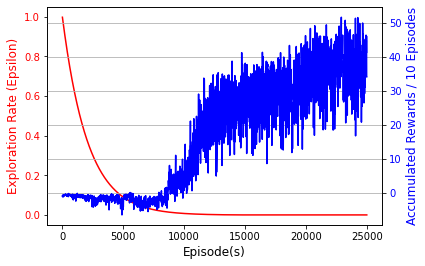

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots() 

ax1.set_xlabel('Episode(s)', fontsize=12) 
ax1.set_ylabel('Exploration Rate (Epsilon)', fontsize=12, color = 'red') 
ax1.plot(t2, epsilon, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('Accumulated Rewards / 10 Episodes', fontsize=12, color = 'blue') 
ax2.plot(t2, average_accumulated_rewards, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
# Show plot
#plt.title('The Accumulated Rewards of 10 by 10 Grid-world Simulation (label uncertainty Pl = 1.0)', fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

In [7]:
np.array(t2).tofile('t2_protest_seq5_Q3_25000.csv', sep = ',')
np.array(average_accumulated_rewards).tofile('rewards_protest_seq5_Q3_25000.csv', sep = ',')

In [8]:
import seaborn as sns
import pandas as pd
RGB = 256
# blue
royalblue = (65/RGB,105/RGB,225/RGB)
dodgerblue = (30/RGB,144/RGB,255/RGB)
# green
green = (0/RGB,128/RGB,0/RGB)
# purple
darkorchid = (104/RGB,34/RGB,139/RGB)
# red & pink
coral = (205/RGB,91/RGB,69/RGB)
red = (139/RGB,0/RGB,0/RGB)
pink = (252/RGB,20/RGB,201/RGB)
orange = (255/RGB,128/RGB,0/RGB)

def cumsum_sma(array, period):
    ret = np.cumsum(array, dtype=float)
    ret[period:] = ret[period:] - ret[:-period]
    return ret[period - 1:] / period

In [9]:
from scipy.interpolate import make_interp_spline
t2_smooth = t2.copy()
average_smooth = average_accumulated_rewards.copy()
X_Y_Spline = make_interp_spline(t2_smooth, average_smooth)
X_ = np.linspace(t2_smooth.min(), t2_smooth.max(), 50)
Y_ = X_Y_Spline(X_)

In [10]:
t = cumsum_sma(t2,100)
averaged = cumsum_sma(average_accumulated_rewards,100)
average_smooth = X_Y_Spline(X_)

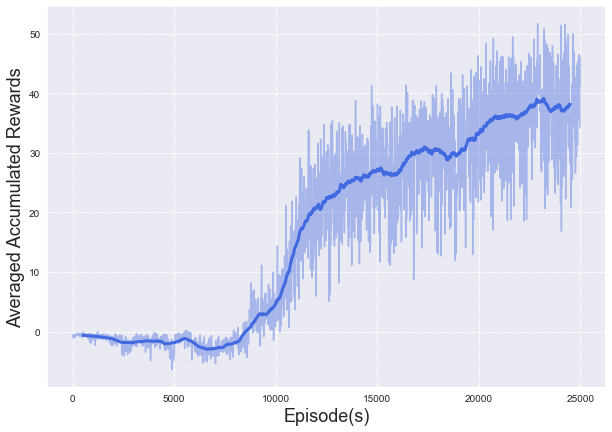

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_xlabel('Episode(s)', fontsize=18) 
ax1.set_ylabel('Averaged Accumulated Rewards', fontsize=18) 

sns.set_style("darkgrid")
sns.lineplot(x = t2, y = average_accumulated_rewards, color=royalblue, alpha=0.4)
sns.lineplot(x = t, y = averaged, color=royalblue, linewidth=3)
plt.grid(color = 'white', linestyle = '--', linewidth = 1)
plt.show()
#sns.move_legend(ax, loc='upper left', frameon=False)

In [39]:
Path = csrl.verify_DRQN(EPISODES=10, num_steps=70, state_sequence_size=5, label_sequence_size=3)

START state: (0, 0, 3, 9)
action: 3
reward-0.01
state: (0, 0, 3, 8)
action: 7
reward-0.01
state: (0, 0, 4, 8)
action: 7
reward-0.01
state: (0, 0, 5, 9)
action: 3
reward-0.01
state: (0, 0, 5, 8)
action: 3
reward-0.01
state: (0, 0, 5, 7)
action: 3
reward-0.01
state: (0, 0, 5, 6)
action: 6
reward-0.01
state: (0, 0, 6, 5)
action: 6
reward-0.01
state: (0, 0, 7, 4)
action: 6
reward-0.01
state: (0, 0, 8, 3)
action: 3
reward-0.01
state: (0, 0, 8, 2)
action: 3
reward0.99
state: (0, 0, 8, 1)
action: 7
reward-0.01
state: (0, 1, 9, 2)
action: 5
reward-0.01
state: (0, 1, 8, 3)
action: 5
reward-0.01
state: (0, 1, 7, 4)
action: 5
reward-0.01
state: (0, 1, 6, 5)
action: 5
reward-0.01
state: (0, 1, 5, 6)
action: 2
reward-0.01
state: (0, 1, 5, 7)
action: 5
reward-0.01
state: (0, 1, 4, 8)
action: 0
reward-0.01
state: (0, 1, 3, 8)
action: 0
reward-0.01
state: (0, 1, 2, 8)
action: 5
reward0.99
state: (0, 1, 1, 9)
action: 7
reward-0.01
state: (0, 0, 1, 9)
action: 1
reward-0.01
state: (0, 0, 2, 9)
action: 1


action: 5
reward-0.01
state: (0, 1, 8, 6)
action: 5
reward-0.01
state: (0, 1, 8, 6)
action: 5
reward-0.01
state: (0, 1, 8, 6)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 7, 5)
action: 5
reward-0.01
state: (0, 1, 6, 4)
action: 5
reward-0.01
state: (0, 1, 5, 5)
action: 5
reward-0.01
state: (0, 1, 4, 6)
action: 7
reward-0.01
state: (0, 1, 5, 7)
action: 5
reward-0.01
state: (0, 1, 4, 8)
action: 0
reward-0.01
state: (0, 1, 3, 8)
episode: 3/10, steps: 70, e: 1.0
START state: (0, 0, 3, 9)
action: 1
reward-0.01
state: (0, 0, 4, 9)
action: 5
reward-

action: 5
reward-0.01
state: (0, 1, 5, 9)
action: 5
reward-0.01
state: (0, 1, 5, 9)
action: 5
reward-0.01
state: (0, 1, 5, 9)
action: 5
reward-0.01
state: (0, 1, 5, 9)
action: 0
reward-0.01
state: (0, 1, 4, 9)
action: 0
reward-0.01
state: (0, 1, 3, 9)
action: 0
reward-0.01
state: (0, 1, 2, 9)
action: 0
reward0.99
state: (0, 1, 1, 9)
action: 7
reward-0.01
state: (0, 0, 1, 9)
action: 1
reward-0.01
state: (0, 0, 2, 9)
action: 1
reward-0.01
state: (0, 0, 3, 9)
action: 1
reward-0.01
state: (0, 0, 4, 9)
action: 6
reward-0.01
state: (0, 0, 4, 9)
action: 6
reward-0.01
state: (0, 0, 5, 8)
action: 3
reward-0.01
state: (0, 0, 5, 7)
action: 3
reward-0.01
state: (0, 0, 5, 6)
action: 6
reward-0.01
state: (0, 0, 6, 5)
action: 6
reward-0.01
state: (0, 0, 7, 4)
action: 6
reward-0.01
state: (0, 0, 8, 3)
action: 3
reward-0.01
state: (0, 0, 9, 2)
action: 3
reward-0.01
state: (0, 0, 8, 2)
action: 3
reward0.99
state: (0, 0, 8, 1)
action: 7
reward-0.01
state: (0, 1, 9, 2)
action: 5
reward-0.01
state: (0, 1, 

In [40]:
############################# Plot the Path ##############################
import pylab as pl
from matplotlib.collections import LineCollection

path_idx = 0

size_x = csrl.shape[2]
size_y = csrl.shape[3]

Path_1=[]
Path_2=[]
Path_3=[]
ii=0
for i in range(0,len(Path[path_idx])):
    if Path[path_idx][i]>=size_x*size_y:
        break
    Path_1.append(int(Path[path_idx][i]))
ii=i
    
for j in range(ii, len(Path[path_idx]), 1):
    if Path[path_idx][j]<size_x*size_y or Path[path_idx][j]>=2*size_x*size_y:
        break
    Path_2.append(int(Path[path_idx][j]-size_x*size_y))
ii=j

for k in range(ii, len(Path[path_idx]), 1):
    if Path[path_idx][k]>=size_x*size_y:
        break
    Path_3.append(int(Path[path_idx][k]))
    
print('Path_1'+str(Path_1))
print('Path_2'+str(Path_2))
print('Path_3'+str(Path_3))

Path_1[39, 38, 48, 59, 58, 57, 56, 65, 74, 83, 82, 81]
Path_2[92, 83, 74, 65, 56, 57, 48, 38, 28, 19]
Path_3[19, 29, 28, 38, 48, 57, 56, 65, 74, 83, 82, 81]


In [79]:
Path_1=[17, 27, 27, 17, 7, 17, 27, 26, 36, 46, 45, 44, 43, 53, 52, 51, 61, 71, 81]
Path_2=[71, 61, 51, 41, 42, 43, 44, 45, 44, 45, 35, 36, 26, 16, 17, 18]
Path_3=[8, 18, 17, 27, 17, 27, 26, 36, 46, 56, 55, 65, 75, 74, 84, 83, 82, 81]

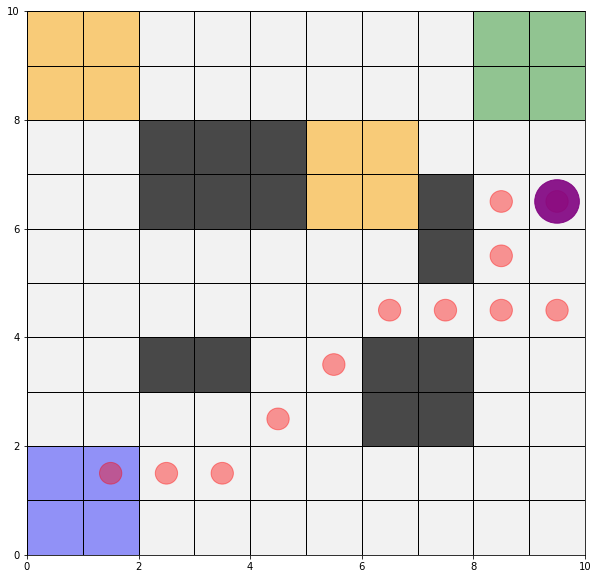

In [41]:
###### q_0 ######
    
x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='grey', alpha=.1))

# plot the 'a' state 'q_0'
b_start_x, b_start_y = 0,0
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.4))

# plot the 'b' state 'q_0'
b_start_x, b_start_y = 8,8
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.4))

# plot the trap state 'q_0'
c_start_x, c_start_y = 0,8
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 5,6
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
'''
c_start_x, c_start_y = 8,0
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 2,4
c_size_x, c_size_y = 1,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 7,4
c_size_x, c_size_y = 1,1
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 4,2
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
'''
# plot the BLOCK state 'q_0'
b_start_x, b_start_y = 2,6
b_size_x, b_size_y = 3,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))
b_start_x, b_start_y = 2,3
b_size_x, b_size_y = 2,1
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))
b_start_x, b_start_y = 6,2
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))
b_start_x, b_start_y = 7,5
b_size_x, b_size_y = 1,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))

for i in range(len(Path_1)):
    state_idx = Path_1[i]+1
    ## convert state index in Julia to 'x,y' coordinates in python
    if state_idx%size_x==0:
        coord_x = size_x-1    # x_coordinate
        #coord_y = int(size_y - (state_idx-state_idx%size_x)/size_x) # y_coordinate
        coord_y = int(size_y - (state_idx/size_y)) # y_coordinate
    else:
        coord_x = state_idx%size_x-1    # x_coordinate
        coord_y = int(size_y - 1 - (state_idx-state_idx%size_x)/size_x) # y_coordinate
    ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
    if i==0:
        # start point
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))


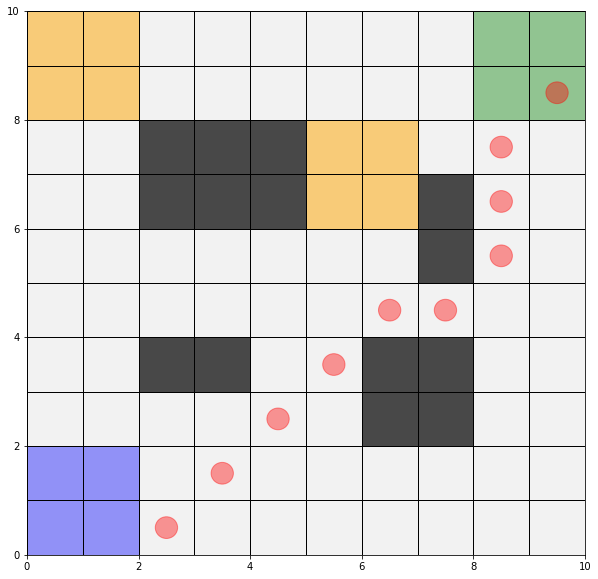

In [42]:
###### q_1 ######

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='grey', alpha=.1))

# plot the 'a' state 'q_0'
b_start_x, b_start_y = 0,0
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.4))

# plot the 'b' state 'q_0'
b_start_x, b_start_y = 8,8
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.4))

# plot the trap state 'q_0'
c_start_x, c_start_y = 0,8
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 5,6
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
'''
c_start_x, c_start_y = 8,0
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 2,4
c_size_x, c_size_y = 1,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 7,4
c_size_x, c_size_y = 1,1
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 4,2
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
'''
# plot the BLOCK state 'q_0'
b_start_x, b_start_y = 2,6
b_size_x, b_size_y = 3,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))
b_start_x, b_start_y = 2,3
b_size_x, b_size_y = 2,1
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))
b_start_x, b_start_y = 6,2
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))
b_start_x, b_start_y = 7,5
b_size_x, b_size_y = 1,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))

for i in range(len(Path_2)):
    state_idx = Path_2[i]+1
    ## convert state index in Julia to 'x,y' coordinates in python
    if state_idx%size_x==0:
        coord_x = size_x-1    # x_coordinate
        #coord_y = int(size_y - (state_idx-state_idx%size_x)/size_x) # y_coordinate
        coord_y = int(size_y - (state_idx/size_y)) # y_coordinate
    else:
        coord_x = state_idx%size_x-1    # x_coordinate
        coord_y = int(size_y - 1 - (state_idx-state_idx%size_x)/size_x) # y_coordinate
    ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
    '''
    if i==0:
        # start point
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    '''

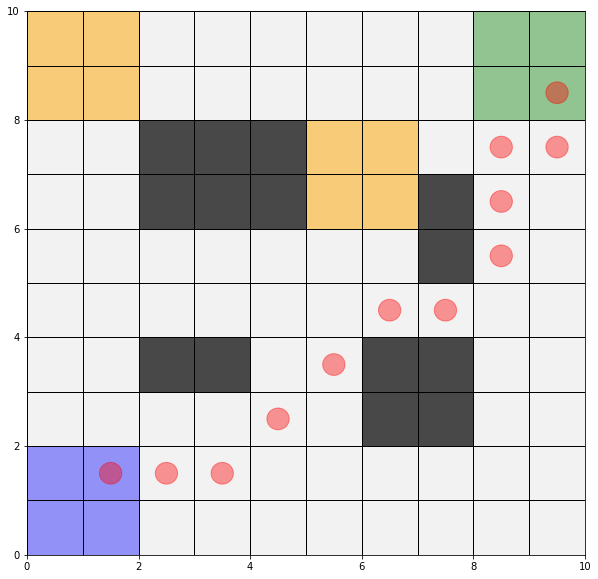

In [43]:
###### q_0 again ######

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='grey', alpha=.1))

# plot the 'a' state 'q_0'
b_start_x, b_start_y = 0,0
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.4))

# plot the 'b' state 'q_0'
b_start_x, b_start_y = 8,8
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.4))

# plot the trap state 'q_0'
c_start_x, c_start_y = 0,8
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 5,6
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
'''
c_start_x, c_start_y = 8,0
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 2,4
c_size_x, c_size_y = 1,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 7,4
c_size_x, c_size_y = 1,1
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
c_start_x, c_start_y = 4,2
c_size_x, c_size_y = 2,2
ax.add_patch(pl.Rectangle((c_start_x, c_start_y), c_size_x, c_size_y, fill=True, color='orange', alpha=.5))
'''
# plot the BLOCK state 'q_0'
b_start_x, b_start_y = 2,6
b_size_x, b_size_y = 3,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))
b_start_x, b_start_y = 2,3
b_size_x, b_size_y = 2,1
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))
b_start_x, b_start_y = 6,2
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))
b_start_x, b_start_y = 7,5
b_size_x, b_size_y = 1,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.7))

for i in range(len(Path_3)):
    state_idx = Path_3[i]+1
    ## convert state index in Julia to 'x,y' coordinates in python
    if state_idx%size_x==0:
        coord_x = size_x-1    # x_coordinate
        #coord_y = int(size_y - (state_idx-state_idx%size_x)/size_x) # y_coordinate
        coord_y = int(size_y - (state_idx/size_y)) # y_coordinate
    else:
        coord_x = state_idx%size_x-1    # x_coordinate
        coord_y = int(size_y - 1 - (state_idx-state_idx%size_x)/size_x) # y_coordinate
    ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))